In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import my_module as my
import seaborn as sns
from datetime import *

In [2]:
# Option d'affichage
pd.set_option("display.max_rows", 2000)
pd.set_option("display.max_columns", 2000)

#### Lecture des données

In [3]:

geo = pd.read_csv('olist_geolocation_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
category = pd.read_csv('product_category_name_translation.csv')

# 1. Analyse exploratoire  
Dans cette partie, nous allons parcourir les datasets, un par un, et analyser leurs données afin de mieux les comprendre.    

**Méthodologie :**  
    Nous allons nettoyer les données qui peuvent principalement servir le but de ce projet et qui est la segmentation des clients. En plus, nous allons créer de nouvelles variables si nécessaire (feature engineering). Pour chaque dataset, nous allons mentionner une section qu'on nommera 'sélection des variables utiles" où on va garder juste les variables que nous estimons utiles pour le merge avec les autres datasets et aussi pour l'analyse des comportements du client.  

## 1.1. Geolocalisation  
Ce jeu de données contient des informations sur les codes postaux brésiliens et leurs coordonnées latitude/longitude. Utile pour tracer des cartes et trouver des distances entre les vendeurs et les clients.  


In [4]:
#aperçu des données
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
#description des données
geo.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [6]:
my.variable_survey(geo)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,geolocation_zip_code_prefix,int64,19015,0.0 %
1,geolocation_lat,float64,717360,0.0 %
2,geolocation_lng,float64,717613,0.0 %
3,geolocation_city,object,8011,0.0 %
4,geolocation_state,object,27,0.0 %


In [7]:
geo_dict = {'geo': geo}
my.dataframe_survey(geo_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,geo,"(1000163,5)",0,0.0 %,261831,0.2617883285024541 %


### Remarque:  
Nous remarquons qu'il y a des doublons dans ce dataset. Nous allons les supprimer

In [8]:
geo = geo.drop_duplicates()

In [9]:
geo.shape

(738332, 5)

In [10]:
geo_dict = {'geo': geo}
my.dataframe_survey(geo_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,geo,"(738332,5)",0,0.0 %,0,0.0 %


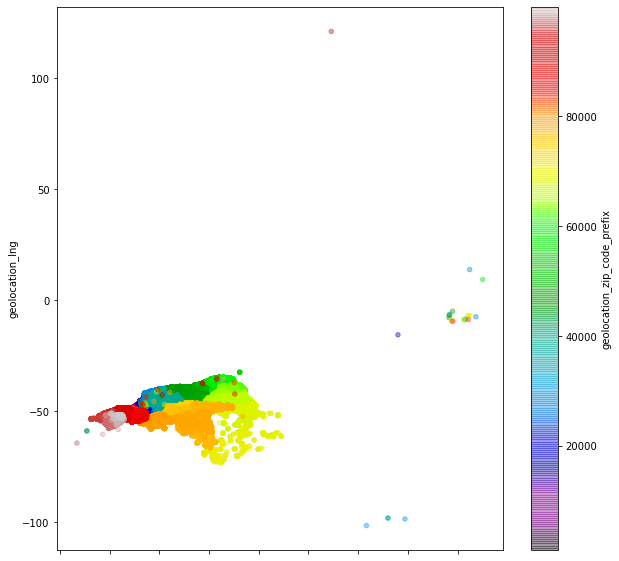

In [11]:
geo.plot(kind="scatter", x="geolocation_lat", y="geolocation_lng",
         alpha=0.4, c="geolocation_zip_code_prefix",
         cmap='nipy_spectral', colorbar=True, figsize=(10, 10))
plt.show()

### Remarque:  
Nous remarquons d'après la représentation géographique des zip-codes la présence des valeurs aberrantes. Nous allons les supprimer. 

In [12]:
geo = geo[geo['geolocation_lat'].between(-35 , 5)]
geo = geo[geo['geolocation_lng'].between(-75 , -33)]

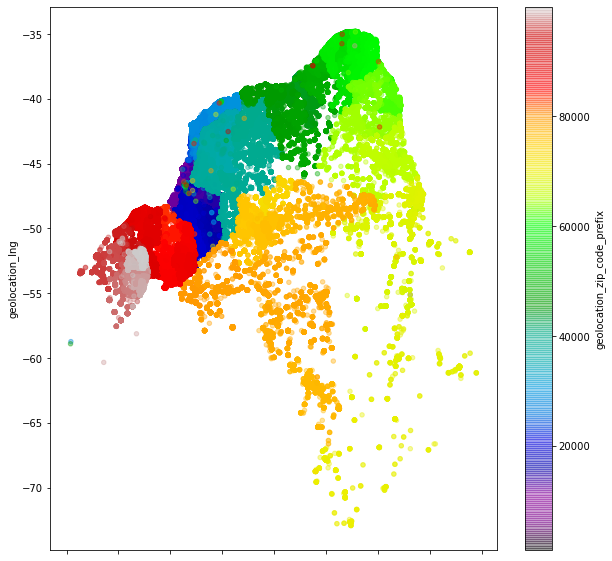

In [13]:
geo.plot(kind="scatter", x="geolocation_lat", y="geolocation_lng",
         alpha=0.4, c="geolocation_zip_code_prefix",
         cmap='nipy_spectral', colorbar=True, figsize=(10, 10))
plt.show()

In [14]:
geo.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [15]:
geo.drop(columns=['geolocation_city', 'geolocation_state'], inplace=True)

In [16]:
geo = geo.groupby(['geolocation_zip_code_prefix'], as_index = False).agg({'geolocation_lat': 'mean',
                                                                          'geolocation_lng': 'mean'})

In [17]:
geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550227,-46.634039
1,1002,-23.547657,-46.634991
2,1003,-23.549000,-46.635582
3,1004,-23.549829,-46.634792
4,1005,-23.549547,-46.636406
...,...,...,...
19005,99960,-27.953722,-52.025511
19006,99965,-28.183372,-52.039850
19007,99970,-28.343920,-51.874988
19008,99980,-28.389500,-51.843122


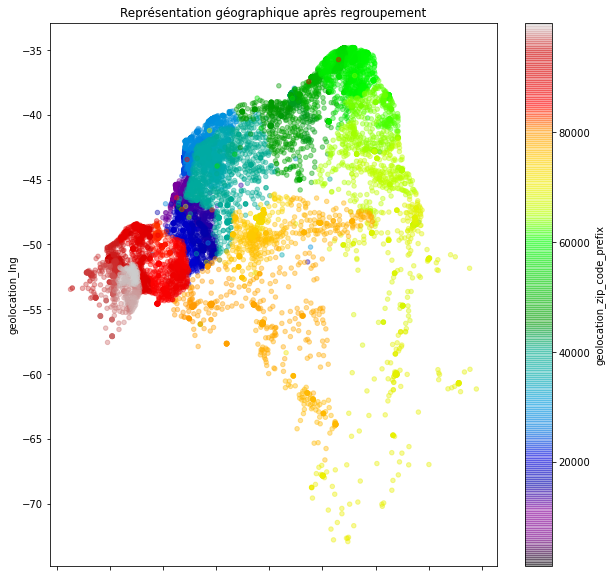

In [18]:
geo.plot(kind="scatter", x="geolocation_lat", y="geolocation_lng",
         alpha=0.4, c="geolocation_zip_code_prefix",
         cmap='nipy_spectral', colorbar=True, figsize=(10, 10))
plt.title('Représentation géographique après regroupement')
plt.show()

## **Sélection des variables utiles**  
Nous allons sélectionner les variables 'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', nous en aurons besoin pour savoir la localisation des vendeurs ainsi que les clients et ensuite calculer les distances qui leurs séparent.

In [19]:
geo.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng'], dtype='object')

## 1.2. Orders / Les commandes  


In [20]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [21]:
#description des données
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,025a244ae3d5e6c53b7f9c902643f510,0d772db64a20cbf2f1bea1c6682b29d0,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [22]:
orders_dict = {'orders' :orders}
my.dataframe_survey(orders_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,orders,"(99441,8)",4908,0.62 %,0,0.0 %


In [23]:
my.variable_survey(orders)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,order_id,object,99441,0.0 %
1,customer_id,object,99441,0.0 %
2,order_status,object,8,0.0 %
3,order_purchase_timestamp,object,98875,0.0 %
4,order_approved_at,object,90733,0.16 %
5,order_delivered_carrier_date,object,81018,1.79 %
6,order_delivered_customer_date,object,95664,2.98 %
7,order_estimated_delivery_date,object,459,0.0 %


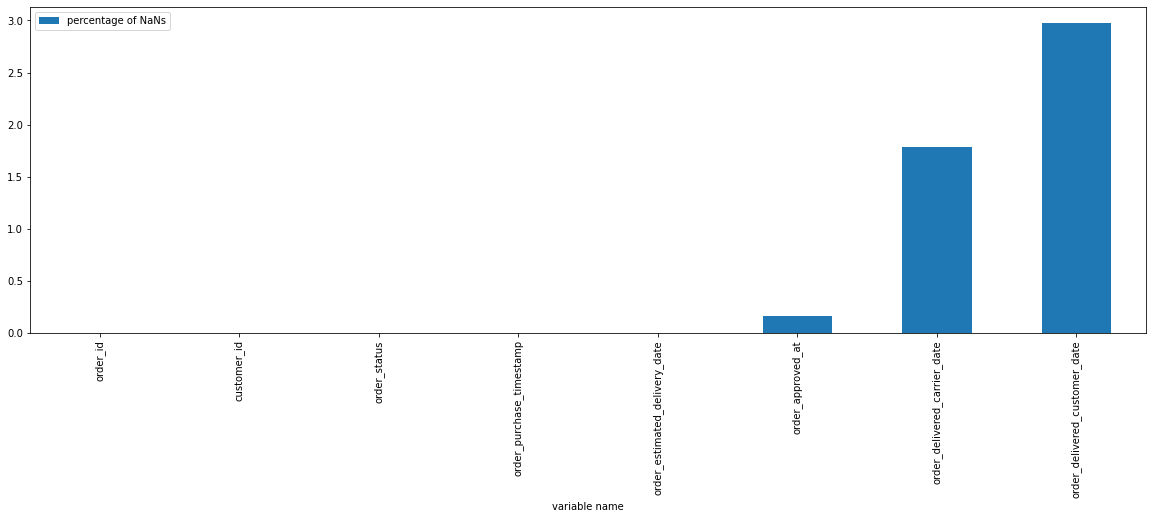

In [24]:
my.nans_df(orders)

Nous allons essayer de comprendre les données manquantes :  
- Dans ce dataset, il y a toute information qui concerne la commande.
- Il y a plusieurs données sur les dates:  
   - order_purchase_timestamp: horodatage de l'achat de la commande
   - order_estimated_delivery_date : date estimé pour la livraison
   - order_approved_at : indique quand la commande est approuvée. Puisqu'il y a des données manquantes, nous mettons comme hypothèse que la commande est approuvée après peux de temps de la date d'achat. Si cette hypothèse est vérifiée, nous allons remplacer les valeurs manquantes par la order_purchase_timestamp.  
   - order_delivered_carrier_date: date de livraison de la commande au partenaire logistique
   - order_delivered_customer_date: date actuelle de livraison au client  
   
Ce qui nous interesse dans ces données, afin d'extraire le RFM, c'est orderID, custumerID, order_purchase_timestamp. 

In [25]:
#conversion des données date de object vers datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [26]:
#vérifions les différents status des commandes
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [27]:
orders['order_status'].value_counts(normalize=True)

delivered      0.970203
shipped        0.011132
canceled       0.006285
unavailable    0.006124
invoiced       0.003158
processing     0.003027
created        0.000050
approved       0.000020
Name: order_status, dtype: float64

<AxesSubplot:ylabel='order_status'>

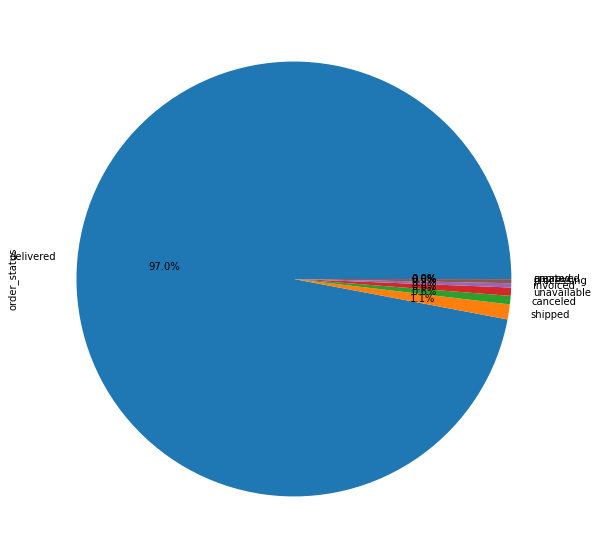

In [28]:
plt.figure(figsize=(12,10))
orders['order_status'].value_counts(normalize=True).plot.pie(autopct="%1.1f%%")

In [29]:
#Nous allons supprimer les commandes annulées
orders = orders[orders.order_status != 'canceled'] 

In [30]:
#verifier qu'on a bien supprimé les commandes annulées
orders['order_status'].value_counts(normalize=True)

delivered      0.976340
shipped        0.011203
unavailable    0.006163
invoiced       0.003178
processing     0.003046
created        0.000051
approved       0.000020
Name: order_status, dtype: float64

## **Sélection des variables utiles**    
Pour ce dataframe, nous allons garder les variables orderID, custumerID, order_purchase_timestamp. Nous allons renommer la variable 'order_purchase_timestamp' afin de simplifier son appel. 

In [31]:
orders_df = orders[['order_id','customer_id', 'order_purchase_timestamp']]
orders_df.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp'], dtype='object')

In [32]:
#renommer 'order_purchase_timestamp'
orders_df = orders_df.rename(columns={"order_purchase_timestamp": "order_date"})

## 1.3. products/ produits

In [33]:
product_dict = {'products': products}
my.dataframe_survey(product_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,products,"(32951,9)",2448,0.83 %,0,0.0 %


--> Nous avons 32951 produits uniques

In [34]:
my.variable_survey(products)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,product_id,object,32951,0.0 %
1,product_category_name,object,73,1.85 %
2,product_name_lenght,float64,66,1.85 %
3,product_description_lenght,float64,2960,1.85 %
4,product_photos_qty,float64,19,1.85 %
5,product_weight_g,float64,2204,0.01 %
6,product_length_cm,float64,99,0.01 %
7,product_height_cm,float64,102,0.01 %
8,product_width_cm,float64,95,0.01 %


In [35]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


La table olist_products_dataset contient les variables suivantes :

    product_id: identifiant du produit
    product_category_name: nom du categorie du produit
    product_name_lenght: nombre de carectères du nom du produit
    product_description_lenght: nombre de carectères dans la description du produit
    product_photos_qty: nombre de photos publiées décrivant le produit
    product_weight_g: le poids du produit en gramme
    product_length_cm: longueur du produit en cm
    product_height_cm: hauteur du produit en cm
    product_width_cm: largeur du produit en cm.

In [36]:
#Nombre de produits uniques
print("Le nombre de catégories est : {}".format(products["product_category_name"].nunique()))

Le nombre de catégories est : 73


In [37]:
products["product_category_name"].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

Nous remarquons que le nom des catégories est en portugais. Nous allons voir si dans les autres dataframes il est mentionné ces nom en anglais ou en français. Ceci sera interessant afin de mieux les comprendre et créer des superclasses.  

## **Sélection des variables utiles**     

Pour le moment, nous allons garder, pour ce dataframe, les variables: product_id et product_category_name

In [38]:
products_df = products[['product_id','product_category_name']]

## 1.4. Sellers/ les vendeurs

In [39]:
sellers_dict = {'sellers':sellers}
my.dataframe_survey(sellers_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,sellers,"(3095,4)",0,0.0 %,0,0.0 %


--> Nous avons 3095 vendeurs uniques

In [40]:
my.variable_survey(sellers)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,seller_id,object,3095,0.0 %
1,seller_zip_code_prefix,int64,2246,0.0 %
2,seller_city,object,611,0.0 %
3,seller_state,object,23,0.0 %


In [41]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP



La table olist_sellers_dataset contient les variables suivantes :

    seller_id: identifiant unique du vendeur
    seller_zip_code_prefix: code postal du vendeur
    seller_city: nom du cité du vendeur
    seller_state: statut du vendeur



In [42]:
sellers['seller_state'].nunique()

23

In [43]:
sellers['seller_city'].nunique()

611

### Remarques:  

- On a 611 vendeurs ayant 23 status différents.
- Après avoir classifier les cités selon l'ordre décroissant de leur fréquence, nous allons afficher les 15 premiers cités où les vendeurs sont citués. Pour ce faire, nous allons automatiser l'affichage des barplots présentant le pourcentage de fréquance de chaque variable.

In [44]:
# fonction qui affiche (en tableau et barplots) le pourcentage de fréquence de chaque\
# valeur d'une variable qualitative

def barplots_var_frequency(data, variable):
    count = pd.DataFrame(data[variable].value_counts())
    count['Pourcentage'] = count.apply(lambda row: round(row*100/sum(count[variable]),2))
    
    NA = data[variable].isna().sum()
    pourc_na=round(NA/data.shape[0],2)*100
    df = pd.DataFrame([NA, pourc_na]).T
    df.rename(columns={0:variable, 1:'Pourcentage'}, index={0:'NaN'}, inplace=True)
    
    count = pd.concat([count, df])
    count = count.iloc[:15]
    
    #afficher un barplots des pourcentages
    plt.figure(figsize=(6, 4))
    sns.barplot(x="Pourcentage", y=count.index, data=count, color="b")
    plt.ylabel(variable)
    plt.xlabel("Pourcentage")
    return count

,seller_zip_code_prefix,Pourcentage
14940,49.0,1.58
13660,10.0,0.32
16200,9.0,0.29
13920,9.0,0.29
14020,8.0,0.26
87050,8.0,0.26
1026,8.0,0.26
37540,7.0,0.23
13481,7.0,0.23
87015,6.0,0.19


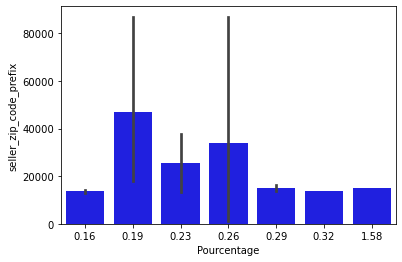

In [45]:
barplots_var_frequency(sellers, 'seller_zip_code_prefix')

,seller_city,Pourcentage
sao paulo,694.0,22.42
curitiba,127.0,4.10
rio de janeiro,96.0,3.10
belo horizonte,68.0,2.20
ribeirao preto,52.0,1.68
guarulhos,50.0,1.62
ibitinga,49.0,1.58
santo andre,45.0,1.45
campinas,41.0,1.32
maringa,40.0,1.29


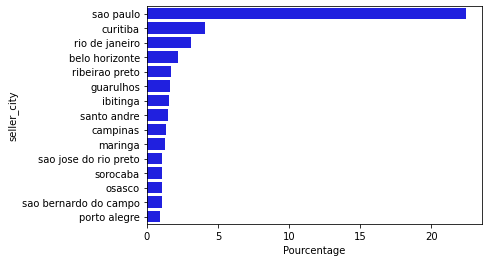

In [46]:
barplots_var_frequency(sellers, 'seller_city')

--> Nous remarquons que la majorité des vendeurs sont à Sao Paulo (22,4%)

In [47]:
sellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

## **Sélection des variables utiles**     

Pour notre projet, nous allons garder toutes les variables du dataframe sellers. Nous pensons que ces informations sur le vendeur peuvent être utile pour savoir si le vendeur et l'acheteur son de la même cité. Ceci pourra être utile pour savoir si un acheteur préfère acheter des produits locaux ou non. 

## 1.5. Reviews/ les commentaires  



Le dataframe "reviews" contient les variables suivantes :

    review_id: identifiant du commentaire
    order_id: identifiant de la commande
    review_score: score de satisfaction donnée par le client par rapport à la commande
    review_comment_title: titre du commentaire donné par le client
    review_comment_message: commentaire laissé par le client. 
    review_creation_date: la date à laquelle l'enquête de satisfaction a été envoyée au client.
    review_answer_timestamp: Affiche l'horodatage des réponses à l'enquête de satisfaction.



In [48]:
review_dict = {'reviews' : reviews}
my.dataframe_survey(review_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,reviews,"(99224,7)",145903,21.01 %,0,0.0 %


In [49]:
my.variable_survey(reviews)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,review_id,object,98410,0.0 %
1,order_id,object,98673,0.0 %
2,review_score,int64,5,0.0 %
3,review_comment_title,object,4527,88.34 %
4,review_comment_message,object,36159,58.7 %
5,review_creation_date,object,636,0.0 %
6,review_answer_timestamp,object,98248,0.0 %


In [50]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


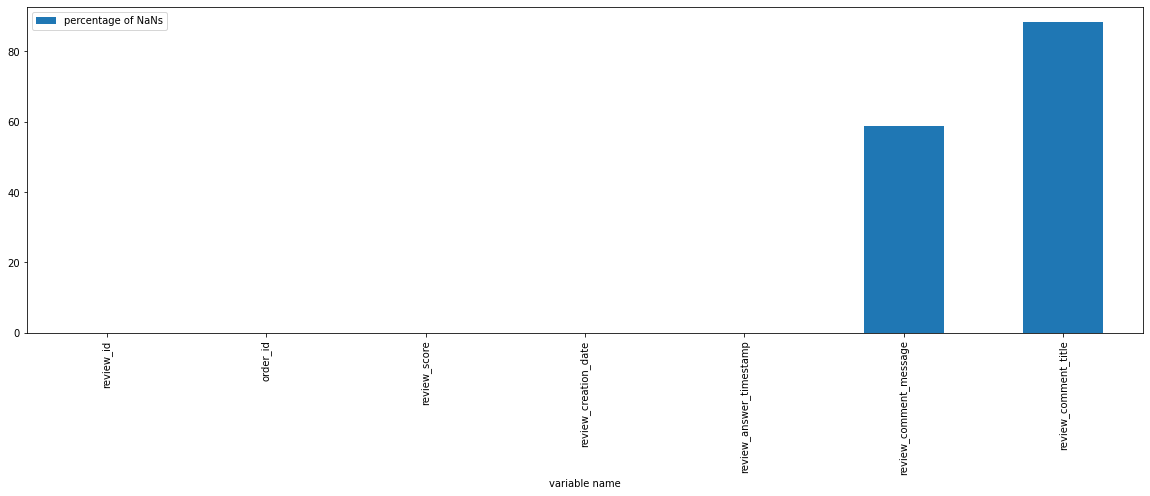

In [51]:
my.nans_df(reviews)

/home/soumaya/anaconda3/envs/openclassrooms/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='review_score', ylabel='Density'>

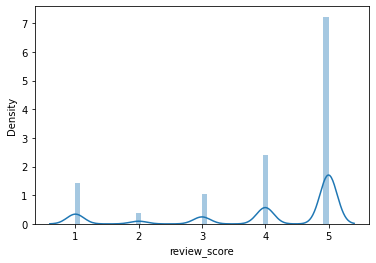

In [52]:
sns.distplot(reviews['review_score'])

### Remarques:  
- Les données dans la variables "review_comment_title" sont presque tous manquantes (presque 90% de Nans)  
- Le client évalue sa commande passé par un commentaire et un score. Les scores sont entre 1 et 5. Le score le plus attribué dans ces données est 5. 

In [53]:
reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

## Sélection des variables utiles:  
Pour notre projet, je pense que savoir si un client est satisfait ou non, ou bien avoir une idée sur son niveau de satisfaction n'est pas très utile pour la segmentation RFM des clients. Mai peut etre qu'on en aura besoin pour tester d'autres approches. Je vais donc garder les variables 'review_id', 'order_id', 'review_score'. Je vais aussi garder les deux variables 'review_answer_timestamp' et 'review_comment_message' et on décidera après de quelle variable on se basera pour voir si un client est actif ou non. 

In [54]:
reviews_df = reviews[['review_id', 'order_id', 'review_score', 'review_creation_date','review_answer_timestamp','review_comment_message']]
reviews_df.columns

Index(['review_id', 'order_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'review_comment_message'],
      dtype='object')

## 1.6. Items   



Le dataframe "items" contient les variables suivantes :

    - order_id: identifiant de la commande
    - order_item_id: numéro séquentiel identifiant le nombre d'articles inclus dans le même ordre.
    - product_id: identifiant du produit
    - seller_id: identifiant du vendeur
    - shipping_limit_date: la date limite dans laquelle le vendeur expédie la commande au partenaire logistique.
    - price: le prix de l'article
    - freight_value: frais de transport des articles (si une commande a plus d'un article, le frais de transport est répartie entre les articles)



In [55]:
items_dict = {'items': items}
my.dataframe_survey(items_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,items,"(112650,7)",0,0.0 %,0,0.0 %


Dans ce dataframe, il n'y a ni des doublons ni des valeurs manquantes.

In [56]:
my.variable_survey(items)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,order_id,object,98666,0.0 %
1,order_item_id,int64,21,0.0 %
2,product_id,object,32951,0.0 %
3,seller_id,object,3095,0.0 %
4,shipping_limit_date,object,93318,0.0 %
5,price,float64,5968,0.0 %
6,freight_value,float64,6999,0.0 %


In [57]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [58]:
items['order_id'].nunique()

98666

In [59]:
sum(items.duplicated('order_id'))

13984

--> Dans ce dataframe, il y on a 98666 commandes avec un seul article et 13984 avec plus qu'un article. 

,order_item_id,Pourcentage
1,98666.0,87.59
2,9803.0,8.70
3,2287.0,2.03
4,965.0,0.86
5,460.0,0.41
6,256.0,0.23
7,58.0,0.05
8,36.0,0.03
9,28.0,0.02
10,25.0,0.02


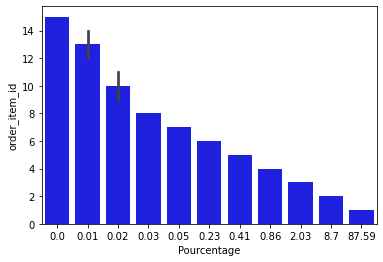

In [60]:
#verifions la fréquence des commandes par rapport aux nombre d'articles commandés
barplots_var_frequency(items, 'order_item_id')

In [61]:
items['order_item_id'].describe()

count    112650.000000
mean          1.197834
std           0.705124
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          21.000000
Name: order_item_id, dtype: float64

--> Nous remarquons que 87,59% des commandes contiennent 1 seul article. Le nombre maximal d'articles dans une commande est 21. 

In [62]:
#nous allons modifier le type de "shipping_limit_date" / date maximale d'expédition en date
items['shipping_limit_date']= pd.to_datetime(items['shipping_limit_date'])

<AxesSubplot:xlabel='price', ylabel='Density'>

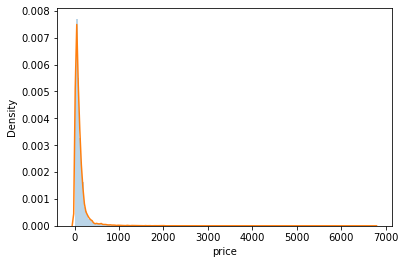

In [63]:
#verifions maintenant la variation des prix des commandes
plt.hist(items['price'], alpha=0.3,  bins=200, density=True)
sns.kdeplot(items['price'])

(0.0, 1000.0)

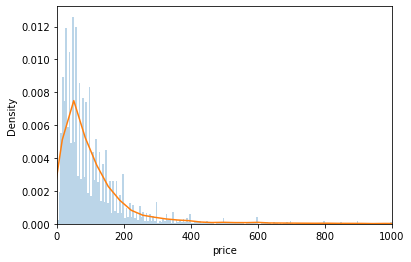

In [64]:
#nous faisons un zoom sur l'intervalle des prix [0, 1000]
plt.hist(items['price'], alpha=0.3, range=(0, 1000),  bins=200, density=True)
sns.kdeplot(items['price'])
plt.xlim(0, 1000)

--> Nous remarquons que la grande majorité des commandes valent 100 réaux. 

In [65]:
items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

## Sélection des variables utiles  

Pour notre projet, nous allons sélectionner toutes les variables 

## 1.7. Customers / Client   


La table customers contient les variables suivantes :

    customer_id: identifiant de la commande. Chaque commande a un custumer_id. 
    customer_unique_id: identifiant du client.
    customer_zip_code_prefix: zip code du client
    customer_city: nom du cité de l'acheteur
    customer_state: état du client


In [66]:
customers_dict ={'customers': customers}
my.dataframe_survey(customers_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,customers,"(99441,5)",0,0.0 %,0,0.0 %


Nous remarquons qu'il n'y a pas ni doublons ni valeurs manquantes dans ce dataframe.

In [67]:
my.variable_survey(customers)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,customer_id,object,99441,0.0 %
1,customer_unique_id,object,96096,0.0 %
2,customer_zip_code_prefix,int64,14994,0.0 %
3,customer_city,object,4119,0.0 %
4,customer_state,object,27,0.0 %


Puisque le nombre de valeur distinctes de customer_id est égale au nombre de lignes du dataframe customers(99441), Nous allons le considérer dans le reste du projet comme identifiant unique des clients. Nous allons supprimer la variable 'customer_unique_id'. 

In [68]:
# Nombre de villes
nbre_city = customers["customer_city"].nunique()
# Nombre d'Etats
nbre_states = customers["customer_state"].nunique()
# Nombre de consommateurs
nbre_customers = customers["customer_unique_id"].nunique()

print("Le nombre de villes est : {}".format(nbre_city))
print("Le nombre d'états est : {}".format(nbre_states))
print("Le nombre de clients est : {}".format(nbre_customers))



Le nombre de villes est : 4119
Le nombre d'états est : 27
Le nombre de clients est : 96096


,customer_city,Pourcentage
sao paulo,15540.0,15.63
rio de janeiro,6882.0,6.92
belo horizonte,2773.0,2.79
brasilia,2131.0,2.14
curitiba,1521.0,1.53
campinas,1444.0,1.45
porto alegre,1379.0,1.39
salvador,1245.0,1.25
guarulhos,1189.0,1.20
sao bernardo do campo,938.0,0.94


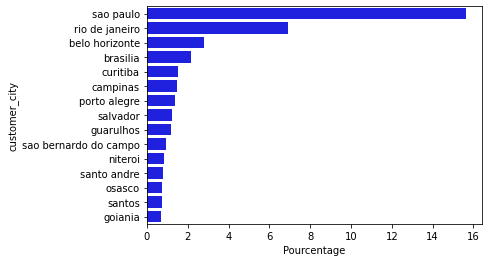

In [69]:
#vérifions la distribution des clients par villes
barplots_var_frequency(customers, 'customer_city')

--> on remarque que la majorité des clients (15,63 %) habitent à Sao Paulo. 

,customer_state,Pourcentage
SP,41746.0,41.98
RJ,12852.0,12.92
MG,11635.0,11.70
RS,5466.0,5.50
PR,5045.0,5.07
SC,3637.0,3.66
BA,3380.0,3.40
DF,2140.0,2.15
ES,2033.0,2.04
GO,2020.0,2.03


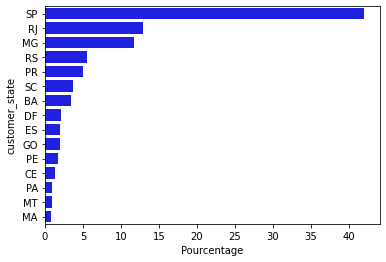

In [70]:
barplots_var_frequency(customers, 'customer_state')

In [71]:
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

--> On remarque que 41.98 % des états présents dans le dataframe sont SP.   
### Sélection des variables utiles  


In [72]:
customers = customers[['customer_id','customer_unique_id', 'customer_zip_code_prefix','customer_city', 'customer_state']]

## 1.8. Payments /Payement  



Le dataframe "payments" contient les variables suivantes :

    order_id: identifiant d'une commande.
    payment_sequential: Le client peut payer une commande avec plusieurs moyens. S'il le fait, une séquence sera créée pour accueillir tous les paiements.
    payment_type: méthode de payment utilisée.
    payment_installments: nombre de versements choisi par le client.
    payment_value: montant payé.



In [73]:
payment_dict = {'payments': payments}
my.dataframe_survey(payment_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,payments,"(103886,5)",0,0.0 %,0,0.0 %


Ce dataframe ne contient ni des valeurs manquantes ni des doublons

In [74]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [75]:
my.variable_survey(payments)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,order_id,object,99440,0.0 %
1,payment_sequential,int64,29,0.0 %
2,payment_type,object,5,0.0 %
3,payment_installments,int64,24,0.0 %
4,payment_value,float64,29077,0.0 %


Nous remarquons que le nombre de lignes totales est 103886, alors que le nombre de commandes passées (selon ses identifiants) est 99440 --> Il y a donc des commandes dupliquées. Nous allons essayer de mieux comprendre ces commandes.

In [76]:
duplicated_cmd = payments[payments['order_id'].duplicated()]
duplicated_cmd

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


Je vais prendre un exemple d'une commande parmi celles dupliquées et qui a été payée par plusieurs moyens pour mieux analyser.

In [77]:
payments[payments['order_id']== 'e6a66a8350bb88497954d37688ab123e']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
826,e6a66a8350bb88497954d37688ab123e,4,voucher,1,8.24
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
16289,e6a66a8350bb88497954d37688ab123e,6,voucher,1,17.30
39743,e6a66a8350bb88497954d37688ab123e,1,voucher,1,4.95
42000,e6a66a8350bb88497954d37688ab123e,3,voucher,1,5.75
45326,e6a66a8350bb88497954d37688ab123e,7,voucher,1,16.11
71825,e6a66a8350bb88497954d37688ab123e,5,voucher,1,19.16
96318,e6a66a8350bb88497954d37688ab123e,8,voucher,1,9.83


In [78]:
items[items['order_id']== 'e6a66a8350bb88497954d37688ab123e']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
101653,e6a66a8350bb88497954d37688ab123e,1,19239f99ecca2c266c57cdce121a6727,57c764b4a836300be881e2ff86e449f9,2017-04-10 19:15:11,79.9,11.95


Nous constatons alors que la somme de 'payment_value" est égale au montant payé (price), plus le frais de transport (freight_value). Nous concluons donc que la variable "payment_sequential" n'est qu'une suite séquentielles des opérations des payments effectuées. 

,payment_type,Pourcentage
credit_card,76795.0,73.92
boleto,19784.0,19.04
voucher,5775.0,5.56
debit_card,1529.0,1.47
not_defined,3.0,0.00
NaN,0.0,0.00


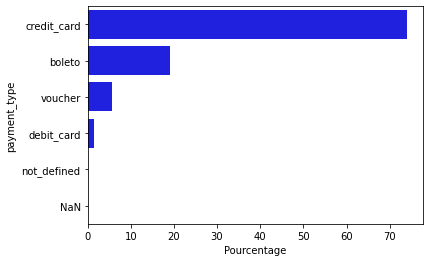

In [79]:
#vérifions les cinq modes de payments utilisés
barplots_var_frequency(payments, 'payment_type')

- Le type de payment "boleto" veux dire billets. C'est le payment en espèces. 
- Nous remarquons que le moyen de payment le plus utilisé est la carte crédit avec un pourcentage de 73,92%. 
- Nous allons supprimer les commandes dont le type de payment est "not_defined"

In [80]:
# On supprime les paiements de type "not_defined"
payment_type = ["credit_card", "boleto", "voucher", "debit_card"]
payments = payments[payments["payment_type"].isin(payment_type)]

In [81]:
#verifier que les types de payment restant
payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

Nous allons voir les montants payés en fonction de type de payment

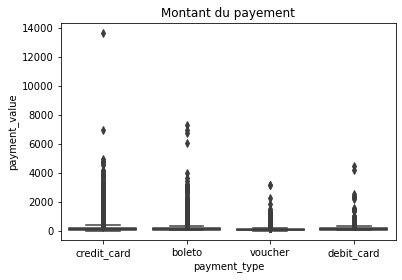

In [82]:
# Boxplot pour chaque type de paiement
plt.title("Montant du payement")
sns.boxplot(data=payments, y="payment_value",
            x="payment_type")
plt.show()

A cause des outliers, l'affichage des boxplots n'est pas clair. Nous allons pas supprimer ces outliers puisque c'est tout à fait normal qu'une commande soit très chère par rapport aux autres. Afin d'améliorer l'affichage, nous allons utiliser le paramètre "showfliers=False" qui permet de cacher les outliers dans l'affichage des boxplots. 

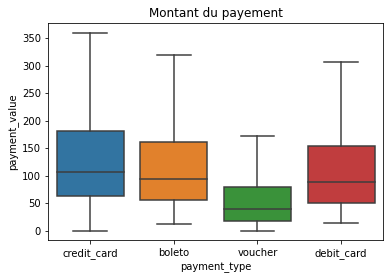

In [83]:
# Boxplot pour chaque type de paiement
plt.title("Montant du payement")
sns.boxplot(data=payments, y="payment_value",
            x="payment_type", showfliers=False)
plt.show()

Nous remarquons que les montants les plus élevés sont payés par credit_card. Par contre, les montants les plus faibles sont payés par les voucher (bon de commande). 

## Selection des variables utiles:  
Nous allons garder toutes les variables de ce dataframe. 

## 1.9. Category / Les catégories
  Dans ce dataframe, les variables sont:
  
        product_category_name: nom de la category du produit
        product_category_name_english: nom de la category du produit en anglais


In [84]:
category_dict = {'category': category}
my.dataframe_survey(category_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,category,"(71,2)",0,0.0 %,0,0.0 %


Dans ce dataframe, il n'y a ni des doublons ni des NaN.

In [85]:
my.variable_survey(category)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,product_category_name,object,71,0.0 %
1,product_category_name_english,object,71,0.0 %


In [86]:
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [87]:
print("Le nombre de catégories est : {}".format(category['product_category_name'].nunique()))

Le nombre de catégories est : 71


Nous allons se servir de ce dataframe pour récupérer les nom des catégories en anglais. Nous allons donc merger le dataframe "category" avec "products" 

In [88]:
#merge products et category
products_df = products_df.merge(category, on='product_category_name', how='left')

In [89]:
products_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


In [90]:
#garder juste product_id et product_category_name_english
products_df = products_df[['product_id', 'product_category_name_english']]

In [91]:
#simplifier la nomination de la variable 'product_category_name_english'
products_df = products_df.rename(columns={"product_category_name_english": "category_name"})

In [92]:
products_df.columns

Index(['product_id', 'category_name'], dtype='object')

## 2. Concaténation des dataframes  et nettoyage

## 2.1. Concaténation des données

Tout les dataframes sont liés par une clée pour faire la jointure. Ce shémas décrit tout les liens: 
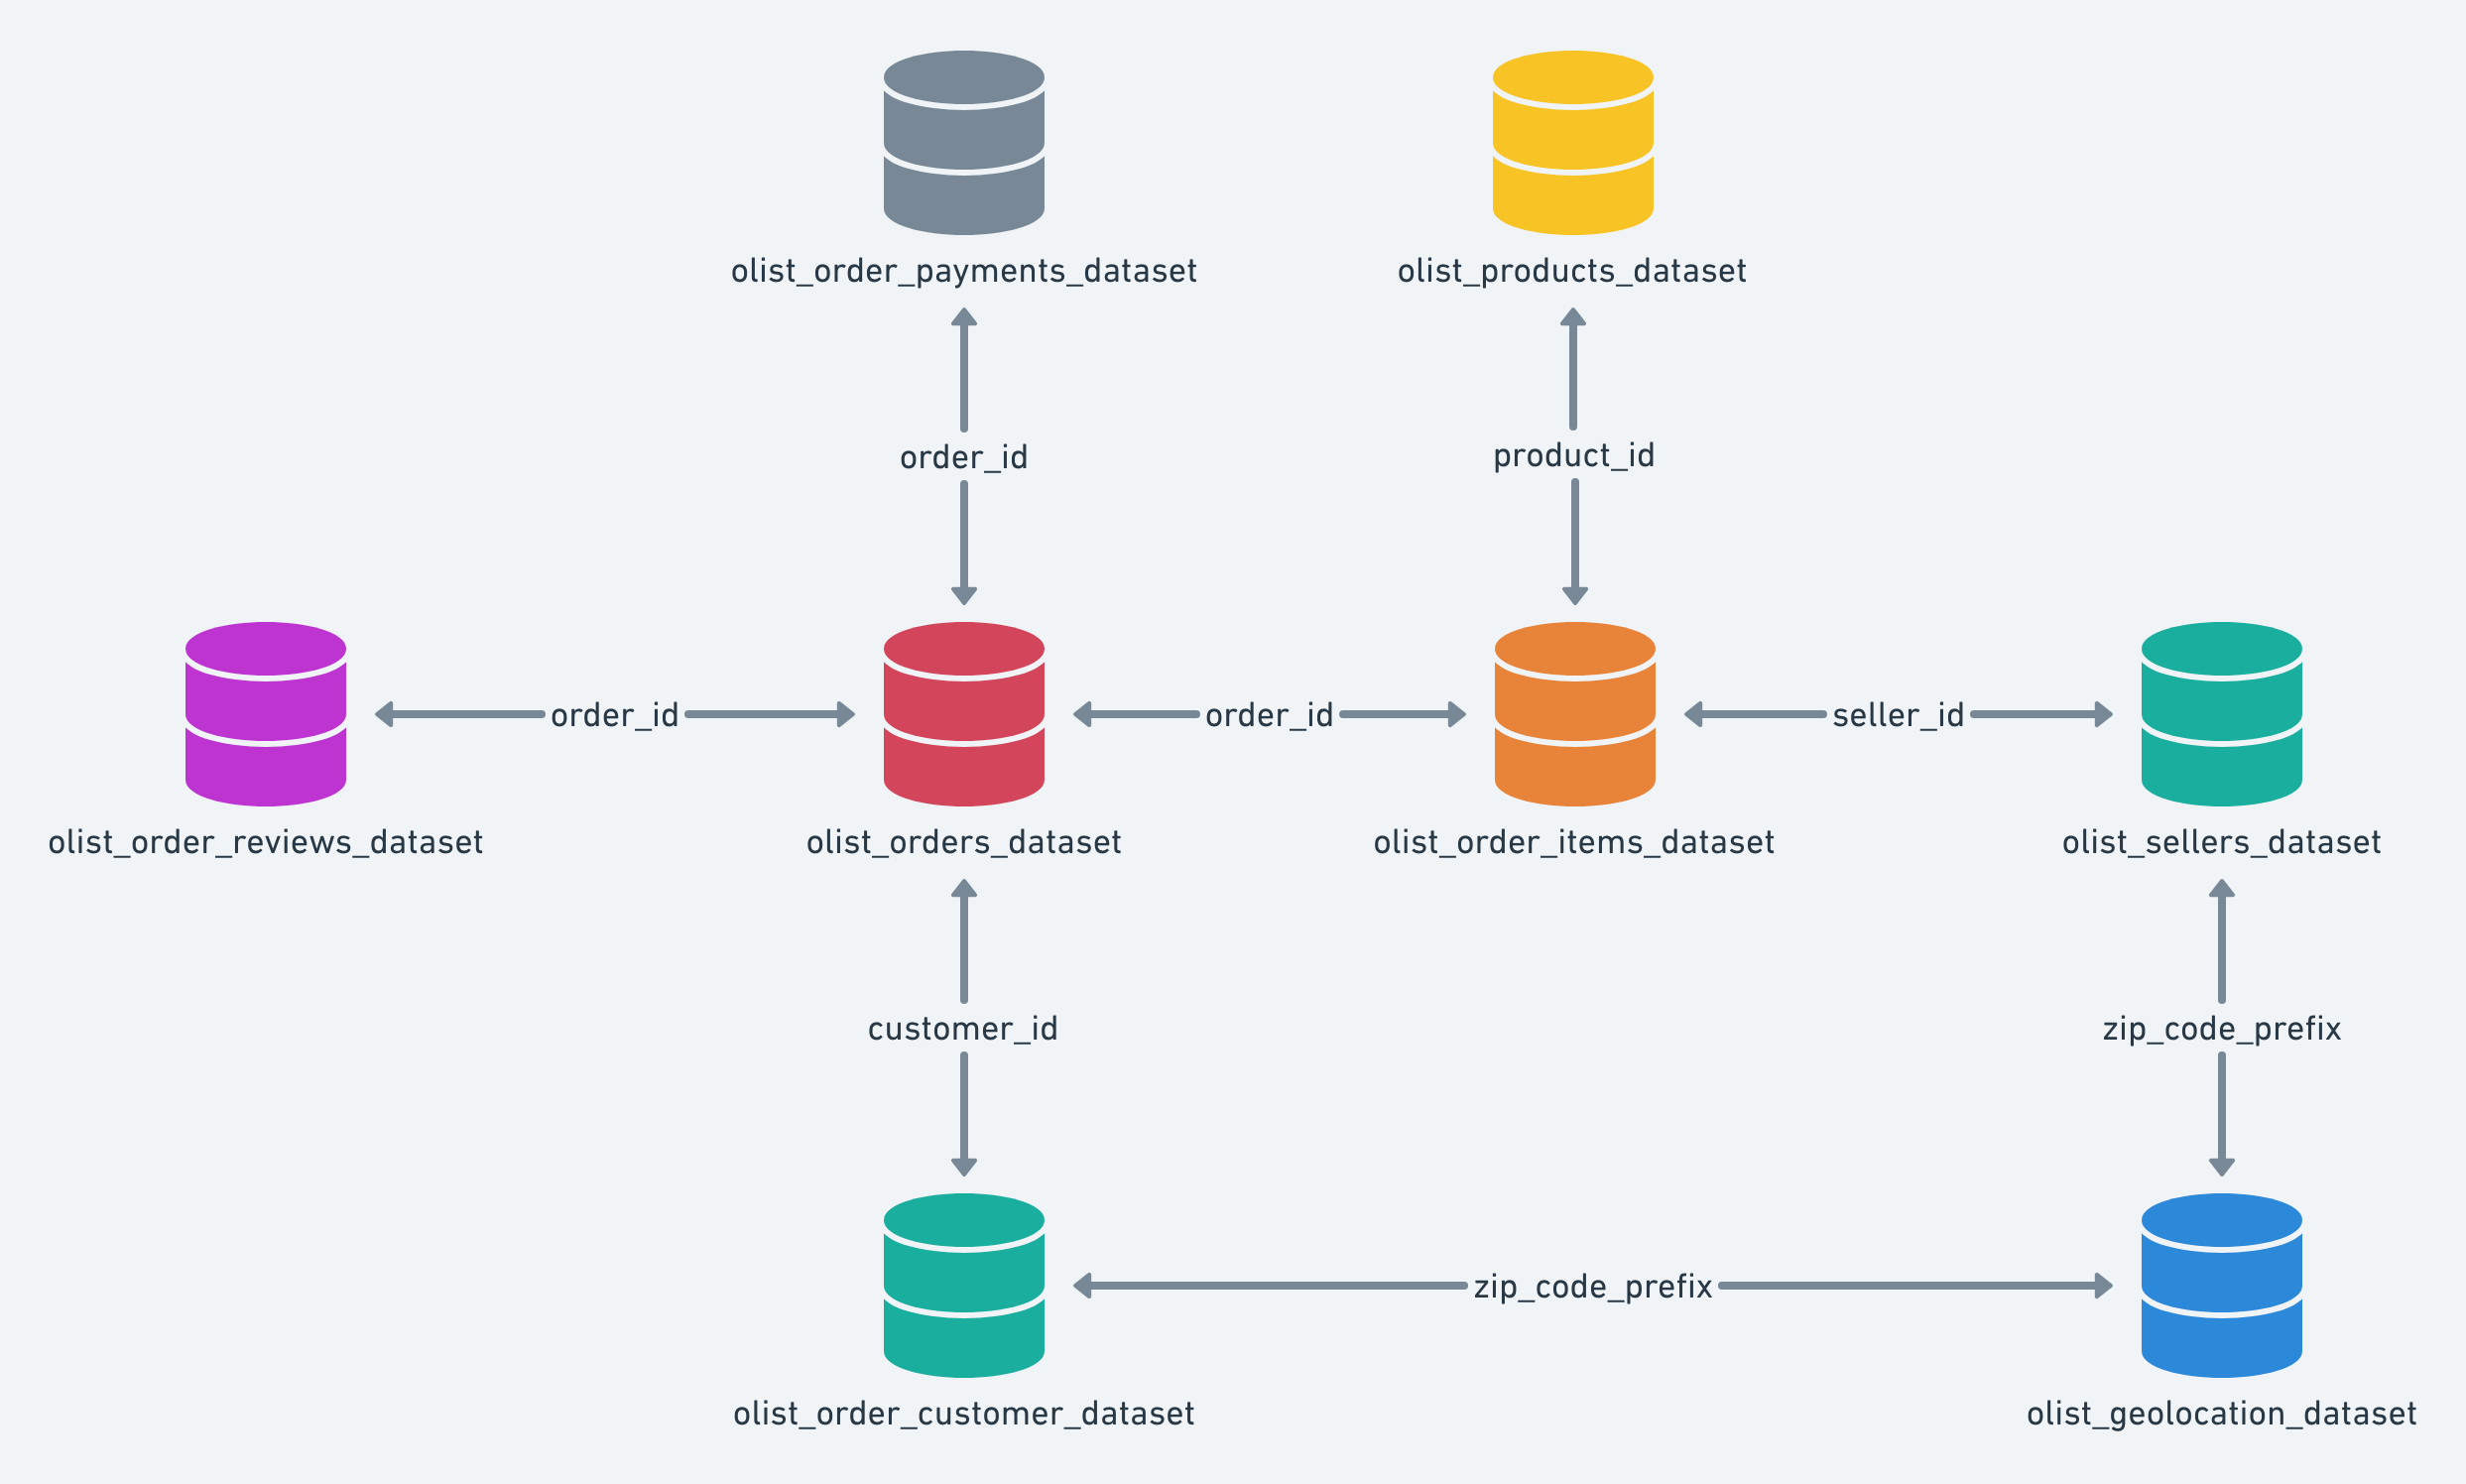


Merger les autres dataframe qui ont dejà des clées en commun

In [93]:
df = customers.merge(orders_df, how='left', on='customer_id')


In [94]:
df = df.merge(reviews_df, how='left', on='order_id')

In [95]:
df = df.merge(payments, how='left', on='order_id')

In [96]:
df = df.merge(items, how='left', on='order_id')

In [97]:
df = df.merge(products_df, how='left', on='product_id')

In [98]:
df = df.merge(sellers, how='left', on='seller_id')

In [99]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_date',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'review_comment_message',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'category_name',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

Merger le dataframe df avec geo pour récupérer seller_lat et seller_long

In [100]:
#creer une nouvelle variable dans df contenant le même identifiant que dans geo (geolocation_zip_code_prefix)
df['geolocation_zip_code_prefix'] = df['seller_zip_code_prefix']
#merger les deux df
df = df.merge(geo, how='left', on='geolocation_zip_code_prefix')
#renommer les coordonnées du seller
df.rename(columns={'geolocation_lat': 'seller_lat','geolocation_lng': 'seller_lng' }, inplace=True)
#supprimer les variables 'geolocation_zip_code_prefix' et 'seller_zip_code_prefix'
df.drop(columns=["geolocation_zip_code_prefix", "seller_zip_code_prefix"], inplace=True)

Merger le dataframe df avec geo pour récupérer customer_lat et customer_long

In [101]:
#creer une nouvelle variable dans df contenant le même identifiant que dans geo (geolocation_zip_code_prefix)
df['geolocation_zip_code_prefix'] = df['customer_zip_code_prefix']
#merger les deux df
df = df.merge(geo, how='left', on='geolocation_zip_code_prefix')
#renommer les coordonnées du seller
df.rename(columns={'geolocation_lat': 'customer_lat','geolocation_lng': 'customer_lng' }, inplace=True)
#supprimer les variables 'geolocation_zip_code_prefix' et 'seller_zip_code_prefix'
df.drop(columns=["geolocation_zip_code_prefix", "customer_zip_code_prefix"], inplace=True)

In [102]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'review_comment_message', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'category_name', 'seller_city', 'seller_state', 'seller_lat',
       'seller_lng', 'customer_lat', 'customer_lng'],
      dtype='object')

## 2.2. Feature engineering  

Dans cette section nous allons créer de nouvelles variables à partir de celles déjà existantes. 

### Préférence d'achat du local   
Nous allons calculer la distance en kilomètre entre deux points géographiques (zip codes de sellers et customers) en se basant sur haversine distance entre latitude et longitude. Par la suite nous allons convertir cette distance en kilomètres. Une fois que la distance est calculée , on va supprimer tout les autres variables qui ont servi à le calculer. 

In [103]:
def haversine_distance(lat1, lon1, lat2, lon2):
   '''
   calculer la distance haversine entre deux points. chaque point a une longitude et latitude.
    
   :param lat1: premier point latitude
   :param lon1: premier point longitude
   :param lat2: Second point latitude
   :param lon2: Second point longitude
    
   :retour: distance entre les deux points en kilometres
   '''
    
   r = 6371 # Planet earth radius in kilometres
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))

   return np.round(res, 2)


In [104]:
df['distance_clientVendeur'] = df.apply(
        lambda row : haversine_distance(row['customer_lat'], row['customer_lng'], row['seller_lat'], row['seller_lng']), axis = 1)


In [105]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'review_comment_message', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'category_name', 'seller_city', 'seller_state', 'seller_lat',
       'seller_lng', 'customer_lat', 'customer_lng', 'distance_clientVendeur'],
      dtype='object')

In [106]:
df.drop(columns=['customer_city','customer_state','seller_city','seller_state','seller_lat',\
                 'seller_lng','customer_lat','customer_lng'], inplace=True)

### Client actif/ passif
Determiner si le client est actif ou non selon le nombre de commentaire qu'il écrit

In [107]:
#mentionner la présence ou non d'aun commentaire
df['isActivite']= np.where((df['review_comment_message'].isnull()), 0,1)

In [108]:
#calculer la somme des commentaires postulé
df['evaluateur']= df.groupby('customer_id')['isActivite'].transform('sum')

In [109]:
df['evaluateur'].unique()

array([ 0,  1,  3,  2,  5,  4, 13,  6,  8, 24,  7, 12, 10,  9, 29, 15, 21,
       11, 14])

In [110]:
#supprimer la variable isActivite et review_comment_message qui ne sont plus utiles maintenant
df.drop(columns=['isActivite','review_comment_message'], inplace=True)

In [111]:
df.head()

,customer_id,customer_unique_id,order_id,order_date,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,category_name,distance_clientVendeur,evaluateur
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,88b8b52d46df026a9d1ad2136a59b30b,4.0,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,office_furniture,348.67,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,2018-01-30 00:00:00,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,housewares,413.82,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,5ad6695d76ee186dc473c42706984d87,5.0,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,office_furniture,29.95,0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,059a801bb31f6aab2266e672cab87bc5,5.0,2018-03-29 00:00:00,2018-04-02 18:36:47,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,office_furniture,18.50,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,8490879d58d6c5d7773f2739a03f089a,5.0,2018-08-10 00:00:00,2018-08-17 01:59:52,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,home_confort,220.06,1


### Réactivité du client  
#determiner le degré de réactivité d'un client en calculant le nombre de jour entre 'review_creation_date' et "review_answer_timestamp"

In [112]:
#convertir en tupe date
df['review_answer_timestamp']= pd.to_datetime(df['review_answer_timestamp'])
df['review_creation_date']= pd.to_datetime(df['review_creation_date'])
#calcul reactivite
df['reactivite'] = (df['review_answer_timestamp']-df['review_creation_date']).dt.days

In [113]:
#nous allons maintenant supprimer les variables review_answer_timestamp et review_creation_date
df.drop(columns=['review_creation_date','review_answer_timestamp'], inplace=True)

In [114]:
df.head()

,customer_id,customer_unique_id,order_id,order_date,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,category_name,distance_clientVendeur,evaluateur,reactivite
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,88b8b52d46df026a9d1ad2136a59b30b,4.0,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,office_furniture,348.67,0,4.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,housewares,413.82,0,11.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,5ad6695d76ee186dc473c42706984d87,5.0,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,office_furniture,29.95,0,0.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,059a801bb31f6aab2266e672cab87bc5,5.0,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,office_furniture,18.50,0,4.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,home_confort,220.06,1,7.0


## 2.2. Imputation des valeurs manquantes   

Dans cette section, nous allons imputer les NaN. Avant de le faire, nous allons faire une sélection des variables qu'on va les utiliser pour la segmentation des clients. 


In [115]:
df.columns

Index(['customer_id', 'customer_unique_id', 'order_id', 'order_date',
       'review_id', 'review_score', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'category_name', 'distance_clientVendeur', 'evaluateur', 'reactivite'],
      dtype='object')

In [116]:
df = df[['customer_id','customer_unique_id','order_id','order_date','review_score','payment_sequential',\
         'payment_type','payment_installments','payment_value', 'freight_value', 'category_name',\
         'evaluateur', 'reactivite','distance_clientVendeur']]

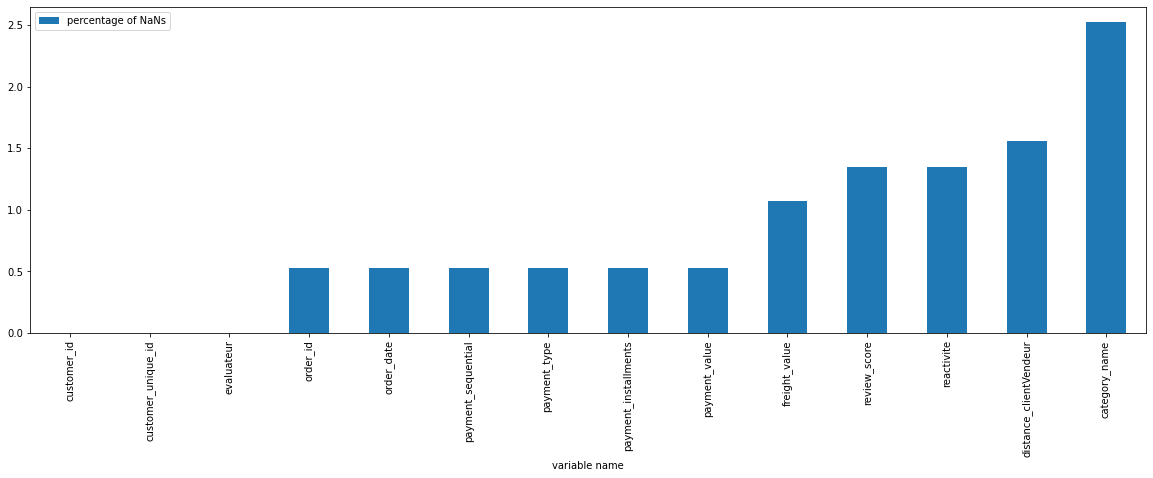

In [117]:
#affichage des barplots des valeurs manquantes
my.nans_df(df)

On remarque que le pourcentage le plus élevé des valeurs manquantes est égale à 25% et c'est pour la variable "category_name". Nous allons imputer les valeurs manquantes.

In [118]:
my.variable_survey(df)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,customer_id,object,99441,0.0 %
1,customer_unique_id,object,96096,0.0 %
2,order_id,object,98816,0.53 %
3,order_date,datetime64[ns],98257,0.53 %
4,review_score,float64,5,1.35 %
5,payment_sequential,float64,29,0.53 %
6,payment_type,object,4,0.53 %
7,payment_installments,float64,24,0.53 %
8,payment_value,float64,28961,0.53 %
9,freight_value,float64,6985,1.07 %


In [119]:
#afficher toutes les variables contenant des NaN
df.columns[df.isna().any()].tolist()

['order_id',
 'order_date',
 'review_score',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'freight_value',
 'category_name',
 'reactivite',
 'distance_clientVendeur']

In [120]:
df_nan = df[df['order_id'].isna()]
df_nan.head()

,customer_id,customer_unique_id,order_id,order_date,review_score,payment_sequential,payment_type,payment_installments,payment_value,freight_value,category_name,evaluateur,reactivite,distance_clientVendeur
52,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
443,3ba47b09546c2da91ef141efce2d5888,b8c37ee810b38c416022e1c9f51e740c,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
445,cfffbb322333151f8df6398a8c3340db,0dc0731aafd5659410244092b0dc7d65,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
477,ffaded93e5a1fce06363cfb6905676a1,587b326ba3bf8aa4d3e50fb1f38ea79f,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1047,c8223f76047e09bea798462f2f46ffa9,b4ee22e08cdaeab0b8e6bf2e67d7c19b,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


- Nous remarquons que la variable 'order_date' contient 0.53% de nan. En affichant un échatillon, nous avons remarqué que même les autres variables sont Nan. Dans le but de ne pas imputer des valeurs trop erronées et puisque le pourcentage est assez faible, nous décidons de supprimer les lignes dont 'order_Id' est nul.

In [121]:
df.shape

(119018, 14)

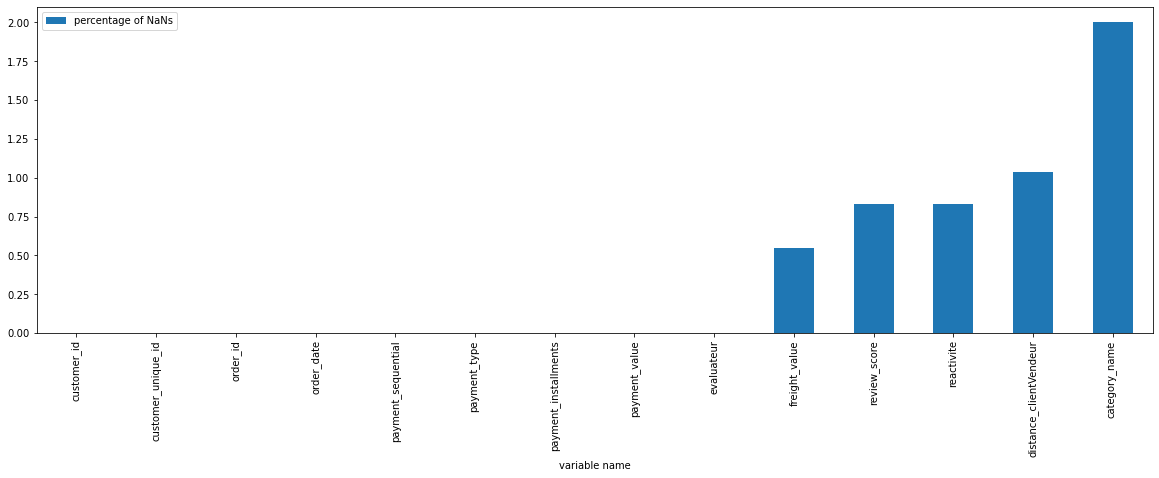

In [122]:
df = df[df['order_id'].notnull()]
#reverifier les nan dans notre df
my.nans_df(df)

In [123]:
df.columns[df.isna().any()].tolist()

['review_score',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'freight_value',
 'category_name',
 'reactivite',
 'distance_clientVendeur']

In [124]:
df.shape

(118393, 14)

## a. Imputation des variables numériques  
Nous allons utiliser l'imputer KnnImputer qui permet de chercher les données semblables à l'échantillon dans lequel il nous manque une information. Il va par la suite remplacer la valeur manquante par la valeur des K échantillons les plus semblables. 

In [125]:
#liste des variables numeriques/quantitatives ayant des nan
numeric_vars_toImpute = [ 'review_score','reactivite','freight_value', 'distance_clientVendeur','payment_value',\
                        'payment_installments','payment_sequential']

In [126]:
#appliquer KNNImputer sur les variables quantitatives
from sklearn.impute import KNNImputer
num_imputer = KNNImputer(n_neighbors = 1)
df[numeric_vars_toImpute] = num_imputer.fit_transform(df[numeric_vars_toImpute])

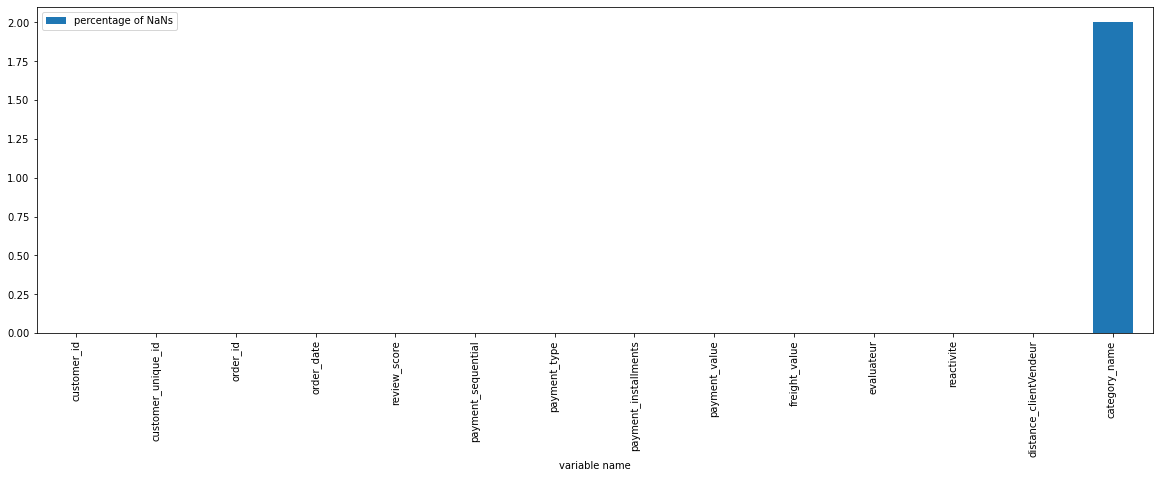

In [127]:
#reverifier la presence des nans
my.nans_df(df)

## b. Imputation des variables qualitatives  
Nous allons imputer les NaN des variables qualitatives par la valeur la plus fréquente en utilisant SimpleImputer.

In [128]:
#appliquer simpleImputer sur les données qualitatives
from sklearn.impute import SimpleImputer
quali_imputer = SimpleImputer(strategy='most_frequent')
df['category_name'] = quali_imputer.fit_transform(df[['category_name']])
df['payment_type'] = quali_imputer.fit_transform(df[['payment_type']])

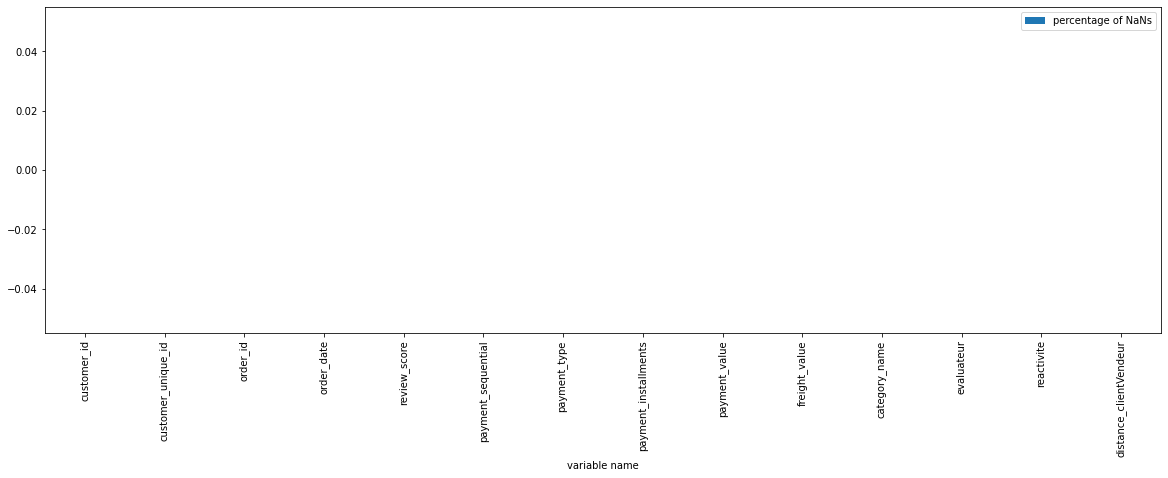

In [129]:
#reverifier les nans
my.nans_df(df)

## 3. Analyses bivariée des données  

    Nous allons baser nos données sur le critère de temps. Pour celà, nous allons créer de nouvelles variables tout en décompactant la variable "order_date", rappelons qu'elle indique la date dans laquelle les commandes sont effectuées. Nous allons donc extraire l'heure, le jour, le jour de la semaine (valeur numérique entre [0 ,6], le mois, l'année, et nous allons aussi créer une autre variable booléenne (purchase_weekend) qui permet d'indiquer si oui ou non l'achat a été effectué pendant le weekend.

In [130]:
df['order_date']

0        2017-05-16 15:05:35
1        2018-01-12 20:48:24
2        2018-05-19 16:07:45
3        2018-03-13 16:06:38
4        2018-07-29 09:51:30
                 ...        
119013   2018-04-07 15:48:17
119014   2018-04-04 08:20:22
119015   2018-04-08 20:11:50
119016   2017-11-03 21:08:33
119017   2017-12-19 14:27:23
Name: order_date, Length: 118393, dtype: datetime64[ns]

In [131]:
#recuperer l'heure
df['order_hour'] = df['order_date'].map(lambda d: d.hour)
#recuperer le jour
df['order_day'] = df['order_date'].map(lambda d: d.day)
#recuperer le jour du weekend
df['order_weekday'] = df['order_date'].map(lambda d: d.dayofweek)
#
df['order_month'] = df['order_date'].map(lambda d: d.month)
df['order_year'] = df['order_date'].map(lambda d: d.year)



In [132]:
df['purchase_weekend'] = np.where(df['order_weekday'].isin([5,6]), 1, 0)
df['purchase_weekend']

0         0
1         0
2         1
3         0
4         1
         ..
119013    1
119014    0
119015    1
119016    0
119017    0
Name: purchase_weekend, Length: 118393, dtype: int64

In [133]:
#verifier le contenu des colonnes
cols= ['order_date','order_hour', 'order_day', 'order_weekday', 'order_month','order_year','purchase_weekend']
df[cols]

,order_date,order_hour,order_day,order_weekday,order_month,order_year,purchase_weekend
0,2017-05-16 15:05:35,15,16,1,5,2017,0
1,2018-01-12 20:48:24,20,12,4,1,2018,0
2,2018-05-19 16:07:45,16,19,5,5,2018,1
3,2018-03-13 16:06:38,16,13,1,3,2018,0
4,2018-07-29 09:51:30,9,29,6,7,2018,1
...,...,...,...,...,...,...,...
119013,2018-04-07 15:48:17,15,7,5,4,2018,1
119014,2018-04-04 08:20:22,8,4,2,4,2018,0
119015,2018-04-08 20:11:50,20,8,6,4,2018,1
119016,2017-11-03 21:08:33,21,3,4,11,2017,0


## 3.1. Commandes par semaine

### valeurs des commandes par jours de la semaine

([<matplotlib.axis.XTick at 0x7f24e2da0370>,
 [Text(0, 0, 'Lundi'),
  Text(1, 0, 'Mardi'),
  Text(2, 0, 'Mercredi'),
  Text(3, 0, 'Jeudi'),
  Text(4, 0, 'Vendredi'),
  Text(5, 0, 'Samedi'),
  Text(6, 0, 'Dimanche')])

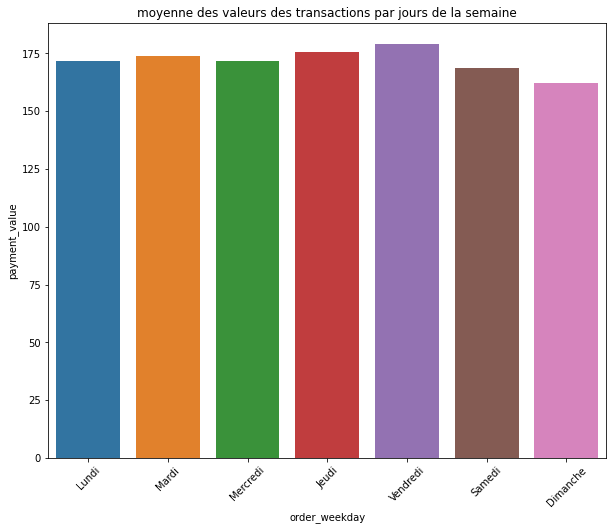

In [134]:
# Jours de la semaine
jr_semaine = ["Lundi", "Mardi", "Mercredi","Jeudi", "Vendredi", "Samedi", "Dimanche"]

# Les données sont groupés par la variable 'order_weekday' et moyennés
payment_value_weekday = df.groupby("order_weekday")["payment_value"].mean().sort_values(ascending=False).reset_index()
#afficher la moyenne des montants des commandes pendant chaque jour de la semaine
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=payment_value_weekday, x="order_weekday",y="payment_value")
plt.title("moyenne des valeurs des transactions par jours de la semaine")
plt.xticks(np.arange(7), jr_semaine, rotation=45)

--> Nous remarquons que c'est en vendredi que les commandes de valeurs les plus élevées s'effectuent.   

### Nombre de commandes par jours de la semaine

In [135]:
#calculons le nombre de commande par jour de semaine
order_in_a_weekday = df["order_weekday"].value_counts().sort_index()
order_in_a_weekday

0    19235
1    19184
2    18528
3    17700
4    16918
5    12811
6    14017
Name: order_weekday, dtype: int64

([<matplotlib.axis.XTick at 0x7f24e2e8e850>,
 [Text(0, 0, 'Lundi'),
  Text(1, 0, 'Mardi'),
  Text(2, 0, 'Mercredi'),
  Text(3, 0, 'Jeudi'),
  Text(4, 0, 'Vendredi'),
  Text(5, 0, 'Samedi'),
  Text(6, 0, 'Dimanche')])

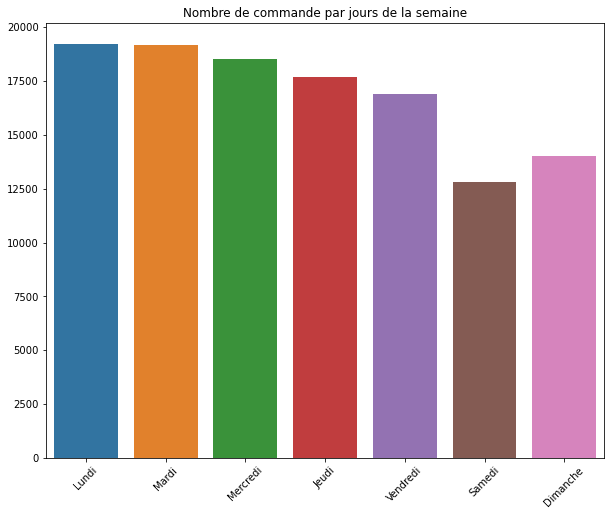

In [136]:
#affichons un barplots des nombres de commandes par jour de semaine
fig = plt.figure(figsize=(10, 8))
sns.barplot(x=order_in_a_weekday.index,y=order_in_a_weekday.values)
plt.title("Nombre de commande par jours de la semaine")
plt.xticks(np.arange(7), jr_semaine, rotation=45)

--> Nous remarquons qu'il y a moins de commandes effectuées pendant le weekend.

## 3.2. Commandes par mois
### Valeurs des commandes par mois

In [137]:
# Mois de l'année
mois = ["Janvier", "Fevrier", "Mars", "Avril",
          "Mai", "Juin", "Juillet", "Aout",
          "Septembre", "Octobre", "Novembre", "Decembre"]

([<matplotlib.axis.XTick at 0x7f24e2655f40>,
 [Text(0, 0, 'Janvier'),
  Text(1, 0, 'Fevrier'),
  Text(2, 0, 'Mars'),
  Text(3, 0, 'Avril'),
  Text(4, 0, 'Mai'),
  Text(5, 0, 'Juin'),
  Text(6, 0, 'Juillet'),
  Text(7, 0, 'Aout'),
  Text(8, 0, 'Septembre'),
  Text(9, 0, 'Octobre'),
  Text(10, 0, 'Novembre'),
  Text(11, 0, 'Decembre')])

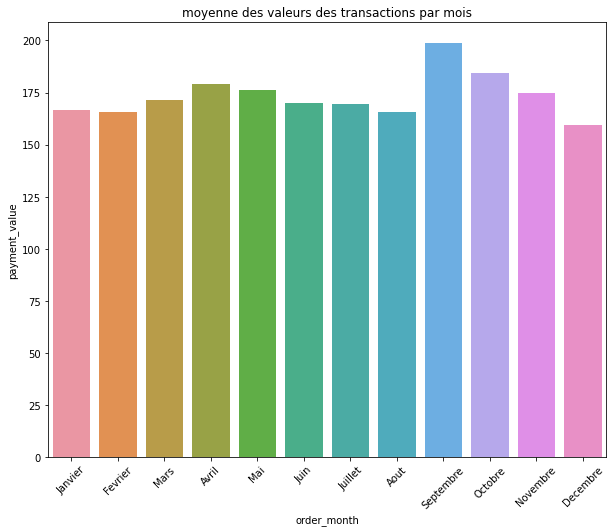

In [138]:
# Les données sont groupées par la variable 'order_month' et moyennés
payment_value_per_month = df.groupby("order_month")["payment_value"].mean().sort_values(ascending=False).reset_index()
#afficher la moyenne des montants des commandes pendant chaque mois
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=payment_value_per_month, x="order_month",y="payment_value")
plt.title("moyenne des valeurs des transactions par mois")
plt.xticks(np.arange(12), mois, rotation=45)

--> Nous remarquons que c'est dans le mois de Septembre que les commandes de valeurs les plus élevées sont faites.  

### Nombre de commandes par mois

In [139]:
#calculons le nombre de commande par mois
order_in_a_month = df["order_month"].value_counts().sort_index()
order_in_a_month

1      9649
2     10081
3     11795
4     11109
5     12663
6     11216
7     12231
8     12673
9      5172
10     6026
11     9145
12     6633
Name: order_month, dtype: int64

([<matplotlib.axis.XTick at 0x7f24e25c66a0>,
 [Text(0, 0, 'Janvier'),
  Text(1, 0, 'Fevrier'),
  Text(2, 0, 'Mars'),
  Text(3, 0, 'Avril'),
  Text(4, 0, 'Mai'),
  Text(5, 0, 'Juin'),
  Text(6, 0, 'Juillet'),
  Text(7, 0, 'Aout'),
  Text(8, 0, 'Septembre'),
  Text(9, 0, 'Octobre'),
  Text(10, 0, 'Novembre'),
  Text(11, 0, 'Decembre')])

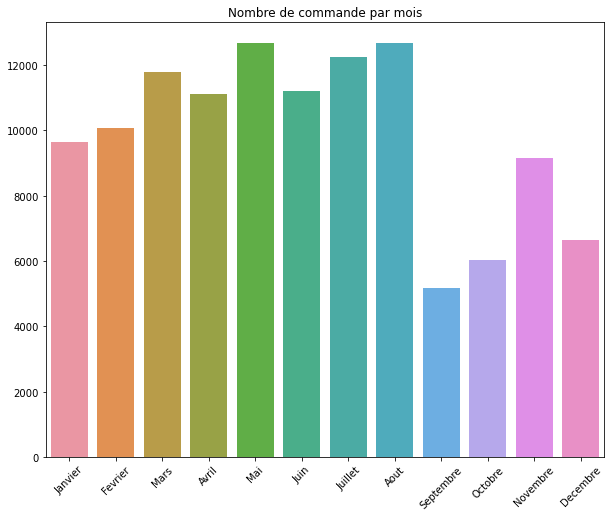

In [140]:
#affichons un barplots des nombres de commandes par mois
fig = plt.figure(figsize=(10, 8))
sns.barplot(x=order_in_a_month.index, y=order_in_a_month.values)
plt.title("Nombre de commande par mois")
plt.xticks(np.arange(12), mois, rotation=45)

--> Nous remarquons que le nombre de commandes est plus bas est en mois de septembre malgrès que dans ce même mois sont aussi effectuées les commandes les plus chères. 

## 3.3. Commandes par années
### Valeurs des commandes par années

Text(0.5, 1.0, 'moyenne des valeurs des transactions par mois')

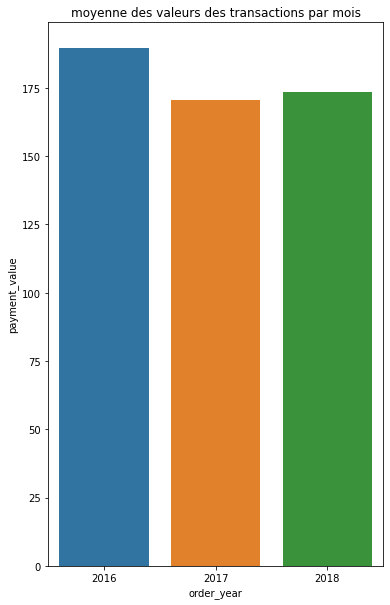

In [141]:
# Les données sont groupées par la variable 'order_year' et moyennées
payment_value_per_year = df.groupby("order_year")["payment_value"].mean().sort_values(ascending=False).reset_index()
#afficher la moyenne des montants des commandes pendant chaque année
fig = plt.figure(figsize=(6, 10))
sns.barplot(data=payment_value_per_year, x="order_year",y="payment_value")
plt.title("moyenne des valeurs des transactions par mois")

--> C'est en 2016 qui sont effectuées les commandes de valeurs les plus élevées

Text(0.5, 1.0, 'Nombre de commande par année')

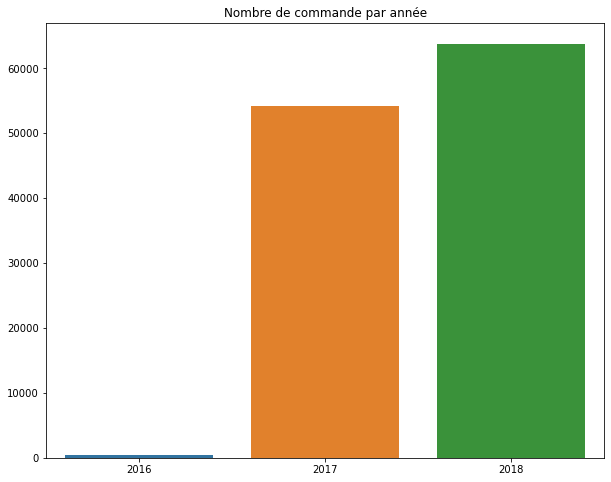

In [142]:
#calculons le nombre de commande par année
order_in_a_year = df["order_year"].value_counts().sort_index()
#affichons un barplots des nombres de commandes par année
fig = plt.figure(figsize=(10, 8))
sns.barplot(x=order_in_a_year.index, y=order_in_a_year.values)
plt.title("Nombre de commande par année")

--> Pareil pour les mois que pour les années, nous remarquons que le nombre de commandes le plus faibles coincides dans la même période avec les valeurs de commandes les plus élevées.  
- Nous remarquons qu'en 2016 sont effectuées très peu de commandes, en les comparant par 2017 et 2018. Peut etre que ceci est dû que les vendeurs n'étaient pas encore très connus en 2016. 
- Le nombre de commandes incrémente au cour des années. 

## 3.4. Commande par catégories  
### Valeurs de commandes par catégorie

In [143]:
df.columns

Index(['customer_id', 'customer_unique_id', 'order_id', 'order_date',
       'review_score', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'freight_value',
       'category_name', 'evaluateur', 'reactivite', 'distance_clientVendeur',
       'order_hour', 'order_day', 'order_weekday', 'order_month', 'order_year',
       'purchase_weekend'],
      dtype='object')

Text(0.5, 1.0, 'valeurs de commandes par catégorie')

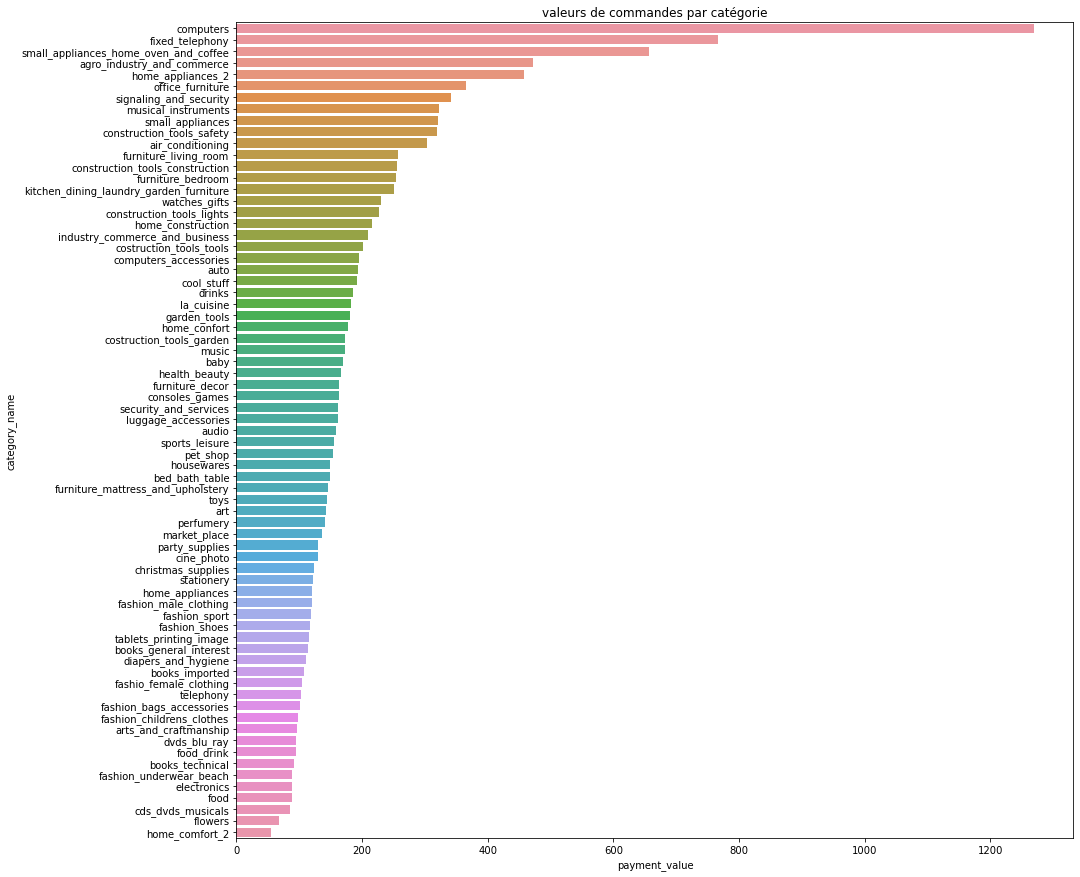

In [144]:
# les données sont regroupées par nom de catégorie
products_value = df.groupby("category_name")["payment_value"].mean().sort_values(ascending=False).reset_index()
# Payement moyen par catégorie 
fig = plt.figure(figsize=(15,15))
sns.barplot(data = products_value, x= 'payment_value', y= 'category_name')
plt.title("valeurs de commandes par catégorie")


--> Nous remarquons que les commandes les plus chères étaient en achetant des ordinateurs, ce qui est très logique. Par contre, les commandes les moins chères sont pour acheter des articles pour le confort de la maison.  

### Nombre de commandes par catégorie

Text(0.5, 1.0, 'Nombre de commandes par catégories')

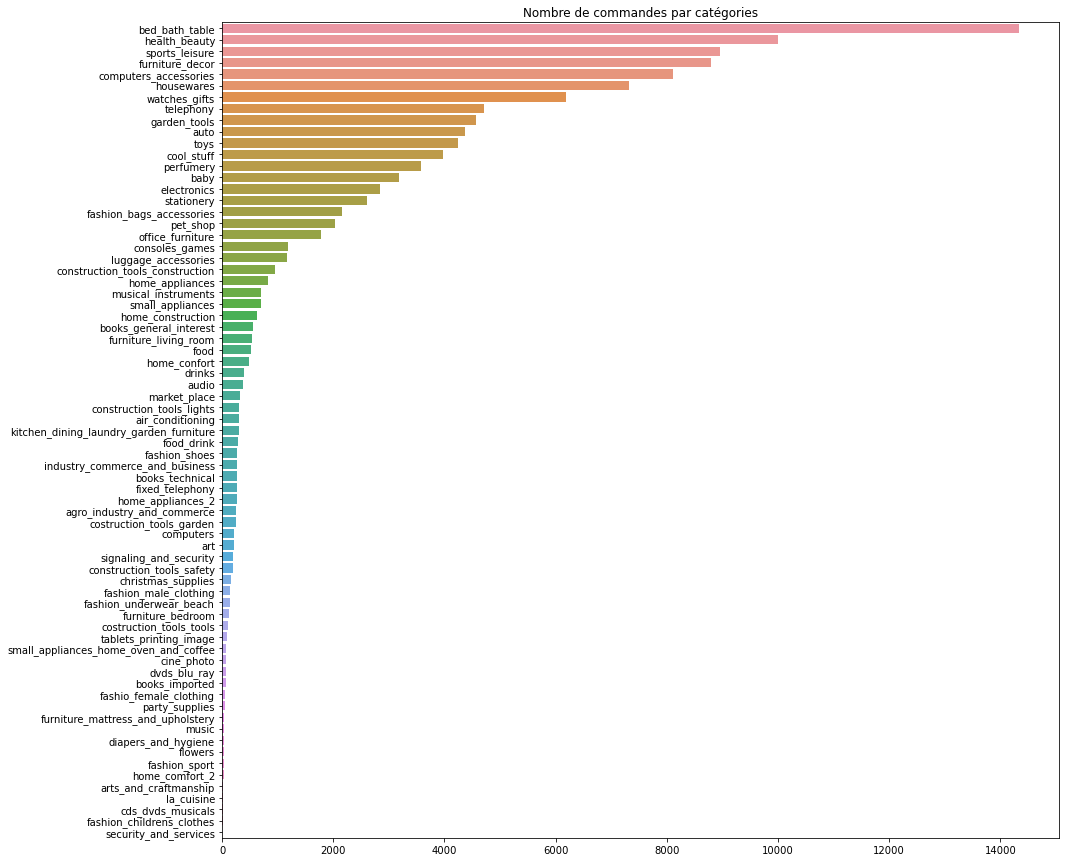

In [145]:
products_count = df['category_name'].value_counts()
fig = plt.figure(figsize=(15,15))
sns.barplot(x= products_count.values, y = products_count.index)
plt.title('Nombre de commandes par catégories')

--> Nous remarquons que la categorie des produits les plus commandées est "bed-bath-table" et en deuxième lieu c'est "health beauty".   
- Nous allons maintenant voir les catégories achetées en 2016 afin d'expliquer le montant élevé par rapport au nombre de commandes très faibles pendant cette année. 

Text(0.5, 1.0, 'Nombre de commandes en 2016 par catégories')

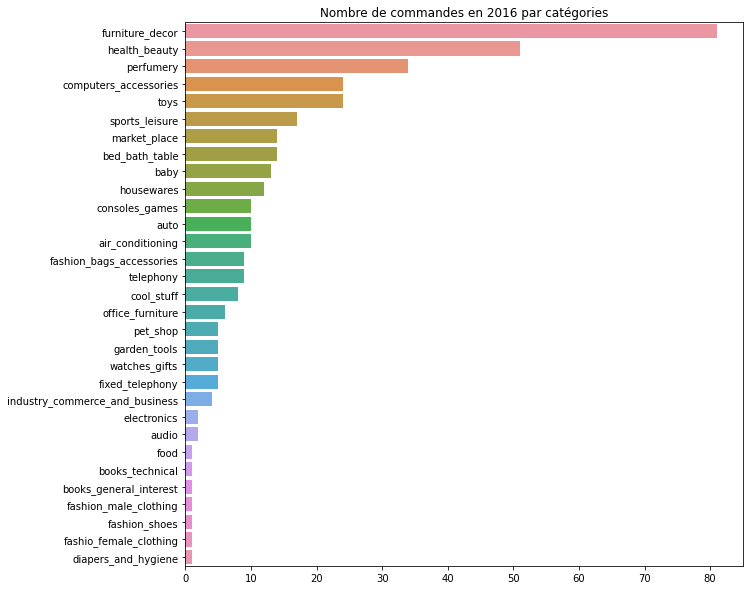

In [146]:
#analyser les catégories des produits les plus achetés en 2016
df_2016 = df[df['order_year']==2016]
products_count = df_2016['category_name'].value_counts()
fig = plt.figure(figsize=(10,10))
sns.barplot(x= products_count.values, y = products_count.index)
plt.title('Nombre de commandes en 2016 par catégories')

Text(0.5, 1.0, 'valeurs de commandes en 2016 par catégorie')

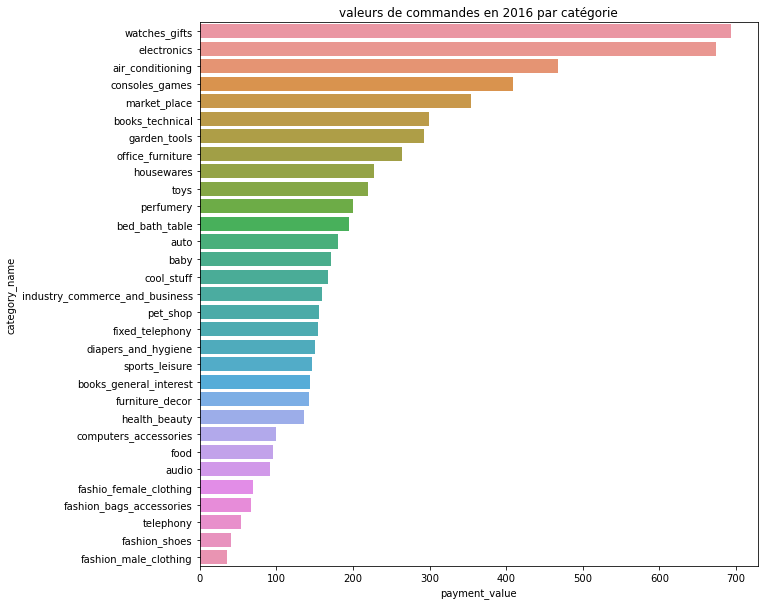

In [147]:
# les données sont regroupées par nom de catégorie
products_value = df_2016.groupby("category_name")["payment_value"].mean().sort_values(ascending=False).reset_index()
# Payement moyen par catégorie 
fig = plt.figure(figsize=(10,10))
sns.barplot(data = products_value, x= 'payment_value', y= 'category_name')
plt.title("valeurs de commandes en 2016 par catégorie")

--> Les deux graphe ci-dessus expliquent bien les valeurs assez élevées pendant 2016. Ainsi, nous remarquons que les produits les plus commandées

## 4. Analyses multivariée

### 4.1. Matrice de corrélation  

Les variables numériques que je vais garder pour analyser la corrélation entre eux sont: 


In [148]:
numeric_vars = ['order_date','review_score','payment_sequential',\
         'payment_type','payment_installments','payment_value', 'freight_value',
         'evaluateur', 'reactivite','distance_clientVendeur']

In [149]:
df_toAnalyse = df[numeric_vars]
df_toAnalyse.columns

Index(['order_date', 'review_score', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'freight_value', 'evaluateur',
       'reactivite', 'distance_clientVendeur'],
      dtype='object')

Text(0.5, 1.0, 'Matrice de corrélation entre les variables quantitatives')

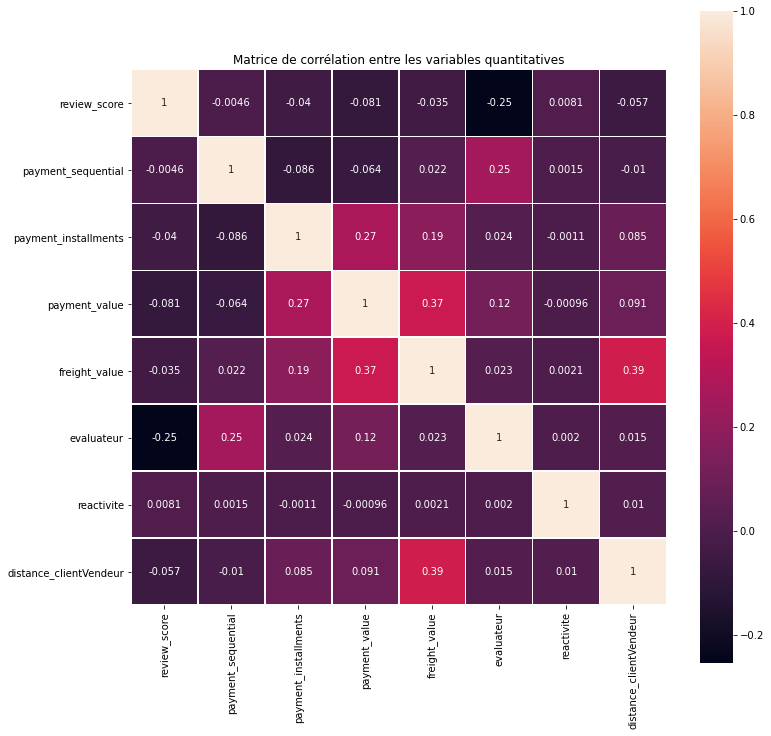

In [150]:
# corrélation entre toutes les variables quantitatives
corr_df = df_toAnalyse.corr(method='pearson')
plt.figure(figsize=(12, 12))
sns.heatmap(corr_df, annot=True,square=True,linewidths=.5)
plt.title("Matrice de corrélation entre les variables quantitatives")
#plt.show()

--> selon la matrice, nous ne remarquons pas la présence de corrélation forte entre les variables. 

## 5. Segmentation RFM  

Dans cette partie, nous allons essayer de segmenter les clients. Pour ce faire, nous allons calculer pour chaque client:  
  - R --> Récence: La proximité du dernier achat, comme par exemple, la durée depuis le dernier achat.  
  - F --> Fréquence: Récurrence des achats sur une période, comme par exemple le nombre d'achat sur la dernière année.  
  - M --> Montant: Dépenses des clients sur une période, comme par exemple la somme de tout les montants payés pendant la dernière année.  
  
### 5.1. Calcul RFM
  Afin d'automatiser le calcul de RFM sur différentes périodes, nous allons créer une fonction pour ce faire.

In [151]:
df.columns

Index(['customer_id', 'customer_unique_id', 'order_id', 'order_date',
       'review_score', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'freight_value',
       'category_name', 'evaluateur', 'reactivite', 'distance_clientVendeur',
       'order_hour', 'order_day', 'order_weekday', 'order_month', 'order_year',
       'purchase_weekend'],
      dtype='object')

In [152]:
print("le nombre de valeurs uniques pour la date d'une commande est: ", df['order_date'].nunique())
print("le nombre de valeurs uniques pour l'identifiant d'une commande est: ",df['order_id'].nunique())

le nombre de valeurs uniques pour la date d'une commande est:  98257
le nombre de valeurs uniques pour l'identifiant d'une commande est:  98816


**Remarque**:  nous remarquons que le nombre de valeurs uniques pour order_id est superieur au nombre de valeurs uniques de order_date. Ceci est parceque (comme on a déjà analysé ci-dessus) une même commande peut être payé par plusieurs moyens et pour chaque moyen, c'est une nouvelle ligne qui s'ajoute au dataframe avec un order_id dupliqué. Pour cette cause, nous allons considérer dans la suite, que l'identifiant d'une commande c'est sa date (order_date)

In [153]:
#definir une fonction  pour calculer RFM
def calcul_rfm(df, date_debut , date_fin):
    #Les paramètres sont:
    # -data: le dataframe qui contient obligatoirement 'customer_id','order_date', et ''payment_value'
    # date_debut: debut de la période pour calculer RFM
    # - date_fin: fin de la periode pour calculer RFM
    #valeur de retour : dataframe contenant les valeurs de RFM
    
    #recuperer uniquement la partie de df dont la date de la commande est dans la période fixée
    test_df = df[df['order_date'].between(date_debut , date_fin)]
    
    #calculer récence
    
    #rajouter une nouvelle variable qui calcule le nombre de jour entre date de commande et date_fin
    test_df['recence_jours'] = test_df['order_date'].map(lambda d: (date_fin - d).days) 
    
    #recuperer le nombre minimal de jours pour avoir la commande la plus récente
    df_recence = test_df[['customer_id', 'recence_jours']]
    df_recence = df_recence.groupby('customer_id')['recence_jours'].agg(['min'])
    
    #calculer frequence
    
    #calculons le nombre de order_date pour chaque client
    df_frequence = test_df[['customer_id', 'order_date']]
    df_frequence =  df_frequence.groupby('customer_id')['order_date'].agg(['count'])
    
    #calculer montant
    
    #calculons le montant total de toutes les commandes effectuées par chaque client
    df_montant = test_df[['customer_id', 'payment_value']]
    df_montant = df_montant.groupby('customer_id')['payment_value'].agg(['sum'])
    
    #merger les trois df contenant les RFM
    df_recence = df_recence.merge(df_frequence, on='customer_id', how='left')
    df_recence = df_recence.merge(df_montant, on='customer_id', how='left')
    
    #renommer les colonnes
    df_RFM = df_recence
    df_RFM.rename(columns={"min": "recence", "count": "frequence", "sum": "montant"}, inplace=True)
    return df_RFM
    
    

In [154]:
df['order_month']

0          5
1          1
2          5
3          3
4          7
          ..
119013     4
119014     4
119015     4
119016    11
119017    12
Name: order_month, Length: 118393, dtype: int64

In [155]:
#definir l'intervalle de la periode dans laquelle on veut calculer RFM
import datetime
date_debut = datetime.datetime(2016, 1, 1)
date_fin =  datetime.datetime(2018, 12, 31)

#calculer RFM
rfm_results = calcul_rfm(df, date_debut , date_fin)
rfm_results.head(10)

,recence,frequence,montant
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,411,1,114.74
000161a058600d5901f007fab4c27140,532,1,67.41
0001fd6190edaaf884bcaf3d49edf079,670,1,195.42
0002414f95344307404f0ace7a26f1d5,501,1,179.35
000379cdec625522490c315e70c7a9fb,272,1,107.01
0004164d20a9e969af783496f3408652,627,1,71.80
000419c5494106c306a97b5635748086,303,1,49.40
00046a560d407e99b969756e0b10f282,377,1,166.59
00050bf6e01e69d5c0fd612f1bcfb69c,469,1,85.23


### 5.2. Analyses graphique de RFM

In [156]:
rfm_results.describe()

,recence,frequence,montant
count,98816.000000,98816.000000,98816.000000
mean,364.167534,1.198116,206.370396
std,153.367003,0.750776,620.945868
min,118.000000,1.000000,9.590000
25%,240.000000,1.000000,62.930000
50%,346.000000,1.000000,110.185000
75%,474.000000,1.000000,196.360000
max,847.000000,63.000000,109312.640000


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


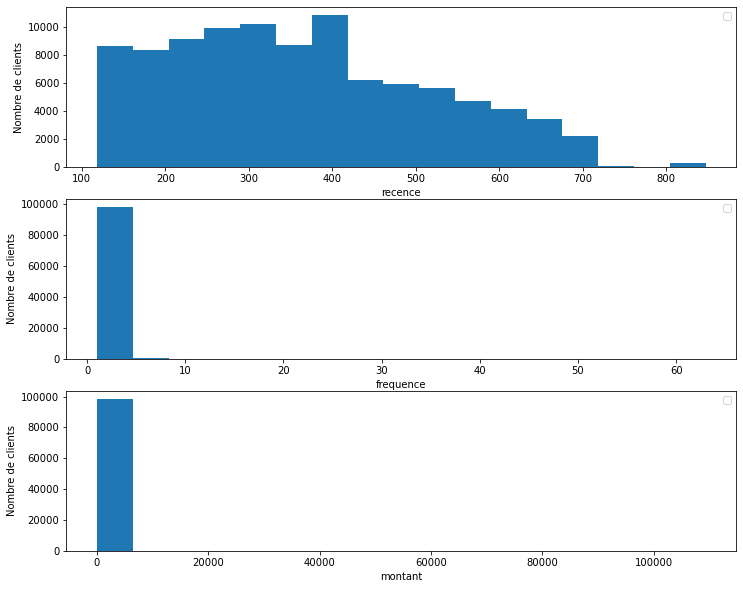

In [157]:
#histogramme de RFM
plt.figure(1, figsize= (12,10))

for i, col in enumerate(rfm_results):
    plt.subplot(len(rfm_results.columns), 1, i + 1)
    plt.hist(rfm_results[col], bins = int(1 + np.log2(len(rfm_results))))
    plt.ylabel("Nombre de clients")
    plt.xlabel(col)
    plt.legend()
plt.show()

/home/soumaya/anaconda3/envs/openclassrooms/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/soumaya/anaconda3/envs/openclassrooms/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/soumaya/anaconda3/envs/openclassrooms/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/soumaya/anaconda3/envs/openclassrooms/lib/python3.8/site-packages/se

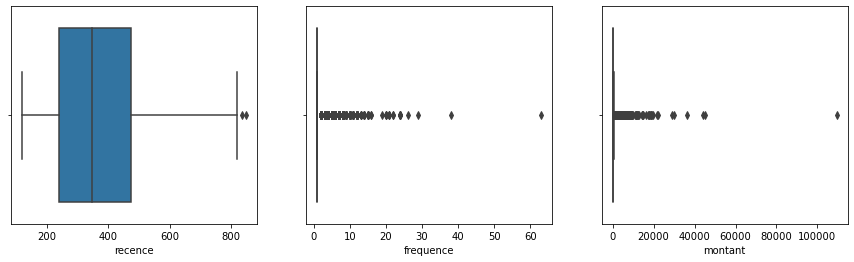

In [158]:
#boxplots
fig = plt.figure(1, figsize=(15, 4))

# Boxplot de la variable Recence
plt.subplot(131)
sns.boxplot(rfm_results["recence"], orient="vertical")

# Boxplot de la variable Frequence
plt.subplot(132)
sns.boxplot(rfm_results["frequence"], orient="vertical")

# Boxplot de la variable Monetary
plt.subplot(133)
sns.boxplot(rfm_results["montant"], orient="vertical")
plt.show()

D'après l'histogramme et les boxplots , nous remarquons la présence des outliers; Nous allons pas les supprimer parce que nous penseon que c'est tout à fait normal d'avoir un déphasage entre fréquence d'achat et montants à payer par chaque client. Dans le but d'améliorer la visibilité de toutes les données, nous allons appliquer le passage en log pour les variables frequence et montant.

In [159]:
#passage en log
rfm_results[['frequence', 'montant']] = rfm_results[['frequence', 'montant']].apply(lambda x: np.log(1+x))

In [160]:
rfm_results['frequence'].unique()

array([0.69314718, 1.60943791, 1.09861229, 1.38629436, 1.94591015,
       2.07944154, 1.79175947, 2.19722458, 2.39789527, 2.56494936,
       2.48490665, 2.77258872, 3.66356165, 2.30258509, 2.83321334,
       3.04452244, 4.15888308, 3.21887582, 2.63905733, 3.09104245,
       2.7080502 , 3.29583687, 3.40119738, 3.13549422, 2.99573227])

/home/soumaya/anaconda3/envs/openclassrooms/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/soumaya/anaconda3/envs/openclassrooms/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/soumaya/anaconda3/envs/openclassrooms/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/soumaya/anaconda3/envs/openclassrooms/lib/python3.8/site-packages/se

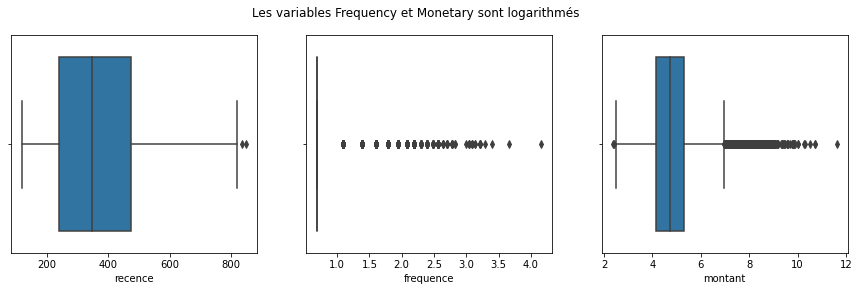

In [161]:
#re-afficher les boxplots apres passage en log
fig = plt.figure(1, figsize=(15, 4))
plt.suptitle("Les variables Frequency et Monetary sont logarithmés")

# Boxplot de la variable Recence
plt.subplot(131)
sns.boxplot(rfm_results["recence"], orient="vertical")

# Boxplot de la variable Frequence
plt.subplot(132)
sns.boxplot(rfm_results["frequence"], orient="vertical")

# Boxplot de la variable Monetary
plt.subplot(133)
sns.boxplot(rfm_results["montant"], orient="vertical")
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


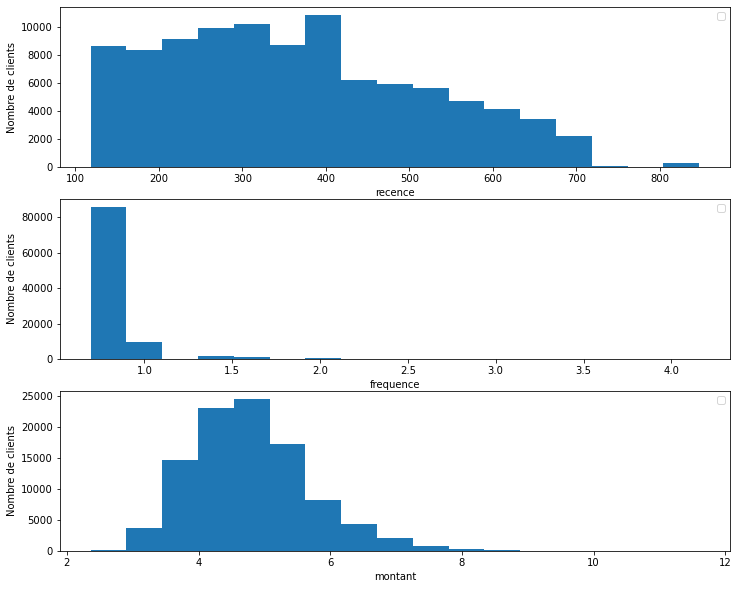

In [162]:
#histogramme de RFM
plt.figure(1, figsize= (12,10))

for i, col in enumerate(rfm_results):
    plt.subplot(len(rfm_results.columns), 1, i + 1)
    plt.hist(rfm_results[col], bins = int(1 + np.log2(len(rfm_results))))
    plt.ylabel("Nombre de clients")
    plt.xlabel(col)
    plt.legend()
plt.show()

Remarques:  
- La majorité des clients passe une seule commande (fréquence).
- en moyenne, les valeurs de commandes sont égales à 207. Cette variable suit une distribution normale après le passage en log. 
- La période de récence varie entre 118 et 847 jours


### 5.3. Attribution des notes aux clients  
 Dans cette partie, nous allons attribuer une note à chaque client et pour chaque composante de RFM. cette note varie de 1 à 4. Puisque recence, frequence et montant sont des variables à maximiser, alors plus R ou F ou M est élevée, plus la note est élevée , et vice-versa. Nous allons attribuer une note à chaque quartile de l'intervalle d'une variable:  
   - note =1 pour le premier quartile
   - note =2 pour le deuxième quartile
   - note =3 pour le troisième quartile
   - note =4 pour le quatrième quartile

In [163]:
rfm_results.describe()

,recence,frequence,montant
count,98816.000000,98816.000000,98816.000000
mean,364.167534,0.761325,4.790931
std,153.367003,0.198211,0.900684
min,118.000000,0.693147,2.359910
25%,240.000000,0.693147,4.157789
50%,346.000000,0.693147,4.711195
75%,474.000000,0.693147,5.285029
max,847.000000,4.158883,11.601976


In [164]:
rfm_results['montant'].quantile(0.2)

4.026957543520246

In [165]:
def r_score(x, quintiles):
    """
    Attribut une note entre 1 et 4 suivant l'emplacement de x par
    rapport aux quartiles. Plus la 'recence' est faible, plus la note
    est élevé
    x(float): valeur
    """

    if x <= quintiles['recence'][.25]:
        return 4
    elif x <= quintiles['recence'][.5]:
        return 3
    elif x <= quintiles['recence'][.75]:
        return 2
    else:
        return 1

In [166]:
def fm_score(x, quintiles, c):
    """
     Attribut une note entre 1 et 4 suivant l'emplacement de x par
    rapport aux quartiles. Plus la 'frequence' ou montant est élevé, plus la note
    est élevée
    x(float): valeur
    """

    if x <= quintiles[c][.25]:
        return 1
    elif x <= quintiles[c][.5]:
        return 2
    elif x <= quintiles[c][.75]:
        return 3
    else:
        return 4

In [167]:
def calculate_quantile(rfm_results):
    """
    Calcul des quantiles pour chaque variable Recence, Frequence et Montant
    puis attribut un score (fm_score et r_score) suivant la valeur
    des variables de chaque individu
    rfm_results(pd.DataFrame): présente les colonnes Recence, Frequence et Montant
    """
    quintiles = rfm_results[['recence',
                     'frequence',
                     'montant']].quantile([.25, .5, .75]).to_dict()

    rfm_results['R'] = rfm_results['recence'].apply(lambda x:
                                    r_score(x, quintiles))
    rfm_results['F'] = rfm_results['frequence'].apply(lambda x:
                                      fm_score(x, quintiles, 'frequence'))
    rfm_results['M'] = rfm_results['montant'].apply(lambda x:
                                     fm_score(x, quintiles, 'montant'))
    return rfm_results


In [168]:
calculate_quantile(rfm_results)

,recence,frequence,montant,R,F,M
customer_id,,,,,,
00012a2ce6f8dcda20d059ce98491703,411,0.693147,4.751346,2,1,3
000161a058600d5901f007fab4c27140,532,0.693147,4.225519,1,1,2
0001fd6190edaaf884bcaf3d49edf079,670,0.693147,5.280255,1,1,3
0002414f95344307404f0ace7a26f1d5,501,0.693147,5.194899,1,1,3
000379cdec625522490c315e70c7a9fb,272,0.693147,4.682224,3,1,2
...,...,...,...,...,...,...
fffecc9f79fd8c764f843e9951b11341,276,1.386294,4.411100,3,4,2
fffeda5b6d849fbd39689bb92087f431,222,0.693147,4.160912,4,1,2
ffff42319e9b2d713724ae527742af25,200,0.693147,5.371242,4,1,4


### 5.4. Segmentation des clients  et visualisation graphique
Nous allons créer 7 segments de clients selon RFM.

In [169]:
def segmentation_clients(rfm_results):
    """
    Retourne le segment associé au client en fonction de son score pour les
    variables R, F et M

    Paramètres:
    rfm_results(pd.DataFrame): doit contenir les colonnes R, F et M

    Return:
    str: Nom du segment
    """

    if 3 <= rfm_results["R"] <= 4 and 3 <= rfm_results["F"] <= 4 and 3 <= rfm_results["M"] <= 4:
        return "Client GOLD"

    elif 3 <= rfm_results["R"] <= 4 and 1 <= rfm_results["F"] <= 3 and 1 <= rfm_results["M"] <= 3:
        return "Client potentiel"

    elif 3 <= rfm_results["R"] <= 4 and rfm_results["F"] <= 1 and rfm_results["M"] <= 1:
        return "Client prometteur"

    elif rfm_results["R"] <= 1 and 3 <= rfm_results["F"] <= 4 and 3 <= rfm_results["M"] <= 4:
        return "Client important"

    elif rfm_results["R"] <= 1 and 2 <= rfm_results["F"] <= 4 and 2 <= rfm_results["M"] <= 4:
        return "Clien en risque"

    elif rfm_results["R"] <= 1 and rfm_results["F"] <= 2 and rfm_results["M"] <= 2:
        return "Client perdu"

    else:
        return "Others"

In [170]:
#attribution des classes de clients
rfm_results['categorie'] = rfm_results.apply(segmentation_clients, axis=1)

In [171]:
rfm_results.head()

,recence,frequence,montant,R,F,M,categorie
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,411,0.693147,4.751346,2,1,3,Others
000161a058600d5901f007fab4c27140,532,0.693147,4.225519,1,1,2,Client perdu
0001fd6190edaaf884bcaf3d49edf079,670,0.693147,5.280255,1,1,3,Others
0002414f95344307404f0ace7a26f1d5,501,0.693147,5.194899,1,1,3,Others
000379cdec625522490c315e70c7a9fb,272,0.693147,4.682224,3,1,2,Client potentiel


In [172]:
#visualisation 3D
def projection_3d_segments(rfm_results, label_categorie) :
    """
    Graphique montrant les différents clients associés à leur segment/cluster respectif
    rfm_results(pd.DataFrame): Table de résultats
    label_categorie(str): nom du segment
    colors(list): liste de couleurs

    """
    fig = plt.figure(1, figsize=(20, 10))

    dx = fig.add_subplot(111, projection='3d')
    # Pour chaque segment, scatter plot des individus avec code couleur
    for i, segment in enumerate(rfm_results[label_categorie].unique()):
        dx.scatter(rfm_results[rfm_results[label_categorie] == segment].recence,
                   rfm_results[rfm_results[label_categorie] == segment].frequence,
                   rfm_results[rfm_results[label_categorie] == segment].montant,
                   label=segment,
                   s=50)
    # Titre des axes et titre graphique
    dx.set_xlabel("Recence")
    dx.set_ylabel("Frequence")
    dx.set_zlabel("Montant")
    plt.title("Représentation 3D des différents individus dans chaque segment")

    plt.legend()
    plt.show()

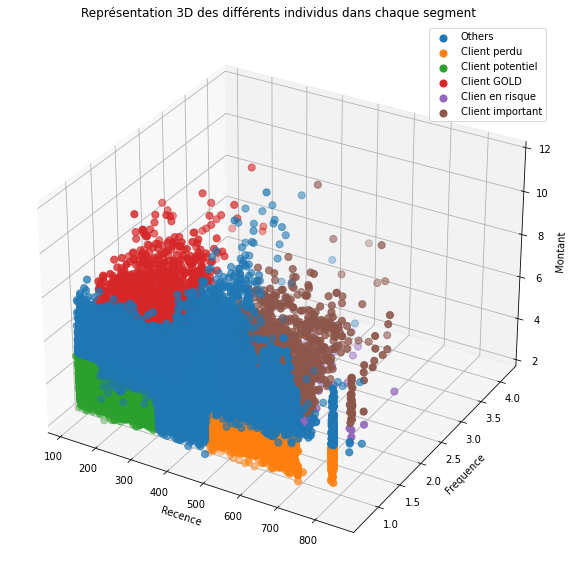

In [173]:
# Graphique 3D (x, y, z) = (Recence, Frequence, Montant)
projection_3d_segments(rfm_results, 'categorie')

Dans la partie suivante, nous allons segmenter les clients en utilisant les modèles de classification non supervisée. Pour ce faire nous devons tout d'abord préparer nos données:  
  1- Encodage des variables qualitatives  
  2- Standardisation des variables  
  3- ACP

# 6. Segmentation non supervisée des clients  

## 6. 1. Prétraitement des données  
Dans cette partie, les variables qu'on va utiliser pour le machine learning sont: 
['customer_id', 'review_score','payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'freight_value', 'category_name', 'distance_clientVendeur', 'evaluateur', 'reactivite']. Nous allons aussi rajouter les variables RFM comme nouvelle features à analyser. 

In [174]:
df['payment_type'].unique()

array(['credit_card', 'debit_card', 'voucher', 'boleto'], dtype=object)

In [175]:
df.columns

Index(['customer_id', 'customer_unique_id', 'order_id', 'order_date',
       'review_score', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'freight_value',
       'category_name', 'evaluateur', 'reactivite', 'distance_clientVendeur',
       'order_hour', 'order_day', 'order_weekday', 'order_month', 'order_year',
       'purchase_weekend'],
      dtype='object')

In [176]:
#recupérer les données interessantes pour l'analyse des clients
finaldf = df[['customer_id', 'customer_unique_id', 'order_date',
       'review_score', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'freight_value',
       'category_name', 'evaluateur', 'reactivite', 'distance_clientVendeur']]

In [177]:
finaldf.shape

(118393, 13)

In [178]:
#merger finaldf avec rfm_results pour recuperer RFM
finaldf = finaldf.merge(rfm_results, how="left", on ='customer_id')

In [179]:
finaldf = finaldf.drop(columns=['R', 'F', 'M', 'categorie'])

In [180]:
finaldf.columns

Index(['customer_id', 'customer_unique_id', 'order_date', 'review_score',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'freight_value', 'category_name', 'evaluateur',
       'reactivite', 'distance_clientVendeur', 'recence', 'frequence',
       'montant'],
      dtype='object')

In [181]:
finaldf.shape

(118393, 16)

### a. Encodage des variables qualitatives  

Pour encoder les variables qualitatives, nous allons tout d'abord créer des superclasses pour category_name. Ensuite, nous allons utiliser l'encodeur OnehotEncoder

In [182]:
print('le nombre de catégories initial est : ',finaldf['category_name'].nunique())

le nombre de catégories initial est :  71


In [183]:
#creer un dictionnaire pour regrouper les différentes catégories des produits sous des sub-classes
finaldf['categorie_produit'] = np.where((finaldf['category_name'].str.contains("fashio|luggage")==True),
                                    'mode',
                           np.where((finaldf['category_name'].str.contains("health|beauty|perfum|diaper|gifts")==True),
                                    'lifestyle',
                           np.where((finaldf['category_name'].str.contains("book|cd|dvd|media|music|audiotoy|baby")==True),
                                     'loisir',
                           np.where((finaldf['category_name'].str.contains("grocer|food|drink")==True), 
                                     'nourriture',
                           np.where((finaldf['category_name'].str.contains("phon|compu|tablet|electro|consol")==True), 
                                     'technology',
                           np.where((finaldf['category_name'].str.contains("flow|home|furnitur|garden|bath|house|applianc|room|cuisine")==True), 
                                    'maison',
                           np.where((finaldf['category_name'].str.contains("tool")==True),
                                     'outils',
                          np.where((finaldf['category_name'].str.contains("sport")==True),
                                     'sport',
                            np.where((finaldf['category_name'].str.contains("commerce|service|market|security|stuff")==True),
                                     'service',        
                                     'divers')))))))))

In [184]:
#supprimer la variable 'category_name'
finaldf.drop(columns='category_name', inplace=True)
#verifier les nouvelles categories générées
print('le nombre de catégories générées est : ',finaldf['categorie_produit'].nunique())

le nombre de catégories générées est :  10


In [185]:
quali_features = ['payment_type', 'categorie_produit']

In [186]:
#encodage de la variable 'categorie_name' et 'payment_type'
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

vars_toencode = finaldf[quali_features]
ohe.fit(vars_toencode)

codes = ohe.transform(vars_toencode).toarray()
feature_names = ohe.get_feature_names(['pay', 'categ'])

select = [x for x in finaldf.columns if x not in quali_features]

finaldf = pd.concat([finaldf.loc[:, select],
               pd.DataFrame(codes,columns=feature_names).astype(int)],
               axis=1)

In [187]:
finaldf

,customer_id,customer_unique_id,order_date,review_score,payment_sequential,payment_installments,payment_value,freight_value,evaluateur,reactivite,distance_clientVendeur,recence,frequence,montant,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,categ_divers,categ_lifestyle,categ_loisir,categ_maison,categ_mode,categ_nourriture,categ_outils,categ_service,categ_sport,categ_technology
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,4.0,1.0,2.0,146.87,21.88,0,4.0,348.67,593,0.693147,4.996334,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,5.0,1.0,8.0,335.48,46.48,0,11.0,413.82,352,0.693147,5.818539,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,5.0,1.0,7.0,157.73,17.79,0,0.0,29.95,225,0.693147,5.067205,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,5.0,1.0,1.0,173.30,23.36,0,4.0,18.50,292,0.693147,5.160778,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,5.0,1.0,8.0,252.25,22.25,1,7.0,220.06,154,0.693147,5.534377,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118388,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 15:48:17,4.0,1.0,6.0,88.78,13.88,0,14.0,357.88,267,0.693147,4.497362,0,1,0,0,0,0,1,0,0,0,0,0,0,0
118389,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:20:22,5.0,1.0,3.0,129.06,14.16,0,4.0,251.15,270,0.693147,4.867996,0,1,0,0,0,0,0,0,0,0,0,0,1,0
118390,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:11:50,1.0,1.0,5.0,56.04,19.04,1,4.0,2367.08,266,0.693147,4.043753,0,1,0,0,0,1,0,0,0,0,0,0,0,0
118391,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:08:33,5.0,1.0,2.0,711.07,22.07,0,2.0,999.04,422,0.693147,6.568176,0,1,0,0,0,1,0,0,0,0,0,0,0,0


## b. Regroupement des données
Puisque customer_id est dupliqué (customer_id = 98816 et customer_unique_id = 95560), nous allons regrouper par l'identifiant unique du client et agréger toutes les autres features. 

A noter que customer_unique_id englobe les clients qui n'ont pas commandé et customer_id représente uniquement les clients qui ont commandés. Un client peut commander plusieurs fois ce qui explique la duplication customer_id. 

Pour ce faire, nous proposons, et pour chaque clée unique du client, de moyenner les variables numériques telque 'montant' et 'reactivité'. Pour les variables de valeur binaire, qui sont les variables générées de l'encodage des variables qualitatives et la variable 'evaluateur', je propose de calculer leur somme. 

In [188]:
finaldf['customer_id'].nunique()

98816

In [189]:
finaldf['customer_unique_id'].nunique()

95560

In [190]:
finaldf.columns

Index(['customer_id', 'customer_unique_id', 'order_date', 'review_score',
       'payment_sequential', 'payment_installments', 'payment_value',
       'freight_value', 'evaluateur', 'reactivite', 'distance_clientVendeur',
       'recence', 'frequence', 'montant', 'pay_boleto', 'pay_credit_card',
       'pay_debit_card', 'pay_voucher', 'categ_divers', 'categ_lifestyle',
       'categ_loisir', 'categ_maison', 'categ_mode', 'categ_nourriture',
       'categ_outils', 'categ_service', 'categ_sport', 'categ_technology'],
      dtype='object')

In [191]:
#regrouper par l'identifiant unique du customer
df_agg = finaldf.groupby(['customer_unique_id'], as_index = False).agg({
                                                                        'review_score' : 'mean',
                                                                        'payment_sequential' : 'mean',
                                                                        'payment_installments' : 'mean',
                                                                        'payment_value' : 'mean',
                                                                        'freight_value' : 'mean',
                                                                        'evaluateur' : 'sum',
                                                                        'reactivite' : 'mean',
                                                                        'distance_clientVendeur' : 'mean',
                                                                        'frequence': 'mean',
                                                                        'recence': 'mean',
                                                                        'montant': 'mean',
                                                                        'pay_boleto': 'sum', 
                                                                        'pay_credit_card' : 'sum',
                                                                        'pay_debit_card' : 'sum',
                                                                        'pay_voucher' : 'sum', 
                                                                        'categ_divers' : 'sum', 
                                                                        'categ_lifestyle' : 'sum',
                                                                        'categ_loisir' : 'sum',
                                                                        'categ_maison' : 'sum', 
                                                                        'categ_mode' : 'sum', 
                                                                        'categ_nourriture' : 'sum',
                                                                        'categ_outils' : 'sum',
                                                                        'categ_service' : 'sum',
                                                                        'categ_sport' : 'sum', 
                                                                        'categ_technology':  'sum'
                                                                                                               
                                                                  })

In [192]:
df_agg.head(20)

,customer_unique_id,review_score,payment_sequential,payment_installments,payment_value,freight_value,evaluateur,reactivite,distance_clientVendeur,frequence,recence,montant,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,categ_divers,categ_lifestyle,categ_loisir,categ_maison,categ_mode,categ_nourriture,categ_outils,categ_service,categ_sport,categ_technology
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,1.0,8.0,141.90,12.00,1,4.0,110.53,0.693147,234.0,4.962145,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,1.0,1.0,27.19,8.29,0,0.0,22.23,0.693147,237.0,3.338967,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,0000f46a3911fa3c0805444483337064,3.0,1.0,8.0,86.22,17.22,0,1.0,517.02,0.693147,660.0,4.468434,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,1.0,4.0,43.62,17.63,1,1.0,2481.24,0.693147,444.0,3.798182,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0004aac84e0df4da2b147fca70cf8255,5.0,1.0,6.0,196.89,16.89,0,4.0,154.52,0.693147,411.0,5.287711,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5,0004bd2a26a76fe21f786e4fbd80607f,4.0,1.0,8.0,166.98,12.98,0,2.0,27.26,0.693147,269.0,5.123845,0,1,0,0,0,0,0,1,0,0,0,0,0,0
6,00050ab1314c0e55a6ca13cf7181fecf,4.0,1.0,1.0,35.38,7.39,0,3.0,101.46,0.693147,254.0,3.594019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
7,00053a61a98854899e70ed204dd4bafe,1.0,1.0,3.0,419.18,18.59,4,0.0,503.50,1.098612,305.0,6.732640,0,2,0,0,0,0,0,0,0,0,0,0,2,0
8,0005e1862207bf6ccc02e4228effd9a0,4.0,1.0,3.0,150.12,15.12,0,6.0,246.86,0.693147,666.0,5.018074,0,1,0,0,0,0,0,0,1,0,0,0,0,0
9,0005ef4cd20d2893f0d9fbd94d3c0d97,1.0,1.0,4.0,129.76,24.86,1,0.0,2250.49,0.693147,293.0,4.873364,0,1,0,0,0,0,0,0,0,0,0,0,1,0


## c. Standardisation

In [193]:
varsToStandardize = ['review_score',
       'payment_sequential', 'payment_installments', 'payment_value',
       'freight_value', 'reactivite', 'distance_clientVendeur',
       'recence', 'frequence', 'montant']

In [194]:
from sklearn.preprocessing import StandardScaler

#nous choisissons le standardisateur le plus basique
scaler = StandardScaler()
#standardiser uniquement les variables quantitatives
df_agg[varsToStandardize] = scaler.fit_transform(df_agg[varsToStandardize])

In [195]:
df_agg.head()

,customer_unique_id,review_score,payment_sequential,payment_installments,payment_value,freight_value,evaluateur,reactivite,distance_clientVendeur,frequence,recence,montant,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,categ_divers,categ_lifestyle,categ_loisir,categ_maison,categ_mode,categ_nourriture,categ_outils,categ_service,categ_sport,categ_technology
0,0000366f3b9a7992bf8c76cfdf3221e2,0.682278,-0.120737,1.902414,-0.076131,-0.519718,1,0.142454,-0.831009,-0.343738,-0.845733,0.189694,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-0.062541,-0.120737,-0.710120,-0.601298,-0.754486,0,-0.262115,-0.979635,-0.343738,-0.826108,-1.621821,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,0000f46a3911fa3c0805444483337064,-0.807360,-0.120737,1.902414,-0.331046,-0.189397,0,-0.160973,-0.146810,-0.343738,1.940965,-0.361303,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,-0.062541,-0.120737,0.409538,-0.526078,-0.163452,1,-0.160973,3.159341,-0.343738,0.527992,-1.109323,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0004aac84e0df4da2b147fca70cf8255,0.682278,-0.120737,1.155976,0.175625,-0.210279,0,0.142454,-0.756966,-0.343738,0.312121,0.553036,0,1,0,0,0,0,0,0,0,0,0,0,0,1


## d. ACP 

In [205]:
vars_to_compress = df_agg.iloc[:,1:-1]
vars_to_compress

,review_score,payment_sequential,payment_installments,payment_value,freight_value,evaluateur,reactivite,distance_clientVendeur,frequence,recence,montant,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,categ_divers,categ_lifestyle,categ_loisir,categ_maison,categ_mode,categ_nourriture,categ_outils,categ_service,categ_sport
0,0.682278,-0.120737,1.902414,-0.076131,-0.519718,1,0.142454,-0.831009,-0.343738,-0.845733,0.189694,0,1,0,0,0,0,0,1,0,0,0,0,0
1,-0.062541,-0.120737,-0.710120,-0.601298,-0.754486,0,-0.262115,-0.979635,-0.343738,-0.826108,-1.621821,0,1,0,0,0,1,0,0,0,0,0,0,0
2,-0.807360,-0.120737,1.902414,-0.331046,-0.189397,0,-0.160973,-0.146810,-0.343738,1.940965,-0.361303,0,1,0,0,1,0,0,0,0,0,0,0,0
3,-0.062541,-0.120737,0.409538,-0.526078,-0.163452,1,-0.160973,3.159341,-0.343738,0.527992,-1.109323,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.682278,-0.120737,1.155976,0.175625,-0.210279,0,0.142454,-0.756966,-0.343738,0.312121,0.553036,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95555,0.682278,-0.120737,2.648853,8.739317,14.459275,0,0.142454,2.343365,1.729416,1.352226,3.945470,0,2,0,0,0,2,0,0,0,0,0,0,0
95556,-0.062541,-0.120737,-0.710120,-0.338554,-0.033095,0,0.243596,1.553428,-0.343738,0.142041,-0.382487,0,1,0,0,0,0,1,0,0,0,0,0,0
95557,0.682278,-0.120737,-0.710120,-0.210913,0.148518,0,-0.059830,1.551678,-0.343738,2.143753,-0.067768,0,1,0,0,1,0,0,0,0,0,0,0,0
95558,0.682278,-0.120737,0.782757,-0.113718,-0.096375,1,-0.059830,0.056519,-0.343738,-0.793400,0.123660,0,1,0,0,0,1,0,0,0,0,0,0,0


In [206]:
from sklearn.decomposition import PCA
# Réduction dimmensionnelle avec 'Principal Component Analysis'
pca = PCA()
df_pca = pca.fit_transform(vars_to_compress)

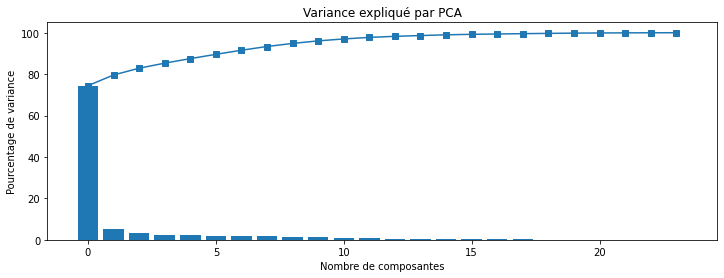

In [208]:
# Affichage graphique
fig = plt.figure(1, figsize=(12, 4))
plt.bar(range(len(pca.explained_variance_ratio_)),
        100*pca.explained_variance_ratio_)
plt.ylim(0, 1.05*100)
plt.plot(range(len(pca.explained_variance_ratio_)),
         100*np.cumsum(pca.explained_variance_ratio_), "s-")
plt.ylabel("Pourcentage de variance")
plt.xlabel("Nombre de composantes")
plt.title("Variance expliqué par PCA")
plt.show()

### Interprétation  
- D'après ce graphe, nous remarquons qu'on peut atteindre 100% de variance à partir de 11 composantes. Il y a donc certainement des features qui n'ont rien ajouté à la variance
- Nous remarquons qu'on peut déjà atteindre 75% de variance à partir d'une seule composante. 
- Dans l'objectif de trouver un compromis entre nombre de composantes et pourcentage de variance, Nous allons réduire la dimension pour atteindre 90% de variance.

In [209]:
# Réduction dimmensionnelle avec 'Principal Component Analysis'
pca = PCA(n_components=0.90)  # 90% de la variance
df_pca = pca.fit_transform(vars_to_compress)

# Mise sous forme de DataFrame
df_pca = pd.DataFrame(df_pca,
                       columns=["Composante_" + str(i)
                                for i in range(df_pca.shape[1])])

In [210]:
df_pca

,Composante_0,Composante_1,Composante_2,Composante_3,Composante_4,Composante_5,Composante_6
0,0.100031,0.305623,0.024145,-1.550339,-0.406348,0.835151,-0.153721
1,-0.973139,-2.031672,-0.002799,-0.551014,-0.739621,-0.231332,0.364752
2,-0.921331,0.237150,-0.291548,-0.696510,1.987333,-0.698857,-1.327753
3,0.033481,-0.198898,-1.060115,1.917232,0.903460,-0.548305,-0.939461
4,-0.924265,0.447100,-0.252426,-1.125410,0.255726,0.813850,-0.534599
...,...,...,...,...,...,...,...
95555,-0.551778,14.555869,-3.533058,4.843719,-1.040876,2.197651,-0.774866
95556,-0.942765,-0.365918,-0.565682,1.244714,0.381269,-0.189923,0.044514
95557,-0.938952,-0.101722,-0.529699,1.320282,1.499018,0.252733,-1.471094
95558,0.062207,0.115202,-0.556150,-0.461391,-0.647754,0.611968,-0.128606
